# Scripts for reproducing Figures in study

## Fig. 1 Schematic overview of the PPI-based computational framework for viral phenotype prediction.

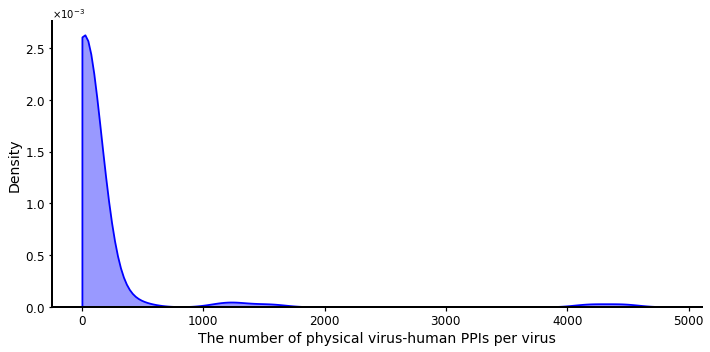

In [ ]:
##====== Fig. 1A Distribution of experimentally determined physical virus-human PPIs ======##

def show_ppi_virus_density():
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import matplotlib.ticker as mticker

    # ======== 读取数据 ========
    df = pd.read_csv("../data/virus_human_physical_ppi.txt", sep="\t", header=0)

    # ======== 每个病毒的 PPI 数 ========
    df_counts = df.groupby("VirusName").size().reset_index(name="ppi_count")

    # ======== 绘制密度分布 ========
    plt.figure(figsize=(10, 5))
    
    sns.kdeplot(
        data=df_counts,
        x="ppi_count",
        fill=True,
        color="blue",       # Nature-style 蓝色
        alpha=0.4,
        linewidth=1.8,
        clip=(0, None),
        bw_adjust=0.6,
    )
    
    # ======== 图形美化 ========
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)

    ax.tick_params(axis='both', labelsize=12, width=1.2)
    ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-2, 2))

    plt.xlabel("The number of physical virus-human PPIs per virus", fontsize=14)
    plt.ylabel("Density", fontsize=14)

    plt.tight_layout()

    plt.savefig("../fig_saved/Fig1A_all_virus_component_v2.pdf",
                format="pdf",
                dpi=300,
                bbox_inches="tight",
                pad_inches=0.1)

    plt.show()


if __name__ == "__main__":
    show_ppi_virus_density()


(16314, 5)


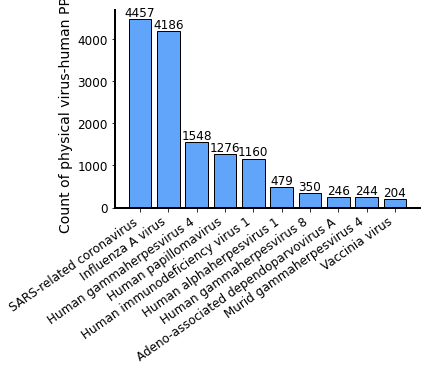

In [ ]:
##====== Fig. 1A The top 10 virus species of all PPIs ======##

def show_ppi_virusFam_top20():
    import pandas as pd
    import matplotlib.pyplot as plt
    
    df = pd.read_csv("../data/virus_human_physical_ppi.txt", sep="\t", header=0)
    print(df.shape)

    # 统计每个病毒科（VirusName）的 PPI 数目（即行数），只取前10
    family_counts = df["VirusName"].value_counts().head(10)

    family_counts.index = [
        name.replace("Severe acute respiratory syndrome-related coronavirus", "SARS-related coronavirus")
        for name in family_counts.index
    ]
    
    # 绘制柱状图
    plt.figure(figsize=(6,5.2))
    bars = plt.bar(family_counts.index, family_counts.values,
                   color="#60a5fa", edgecolor="black")
    
    # 在柱子上方添加数值
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height,
                 str(height), ha='center', va='bottom', fontsize=12)
        
    
    # 设置标签
    plt.ylabel("Count of physical virus-human PPIs", fontsize=14)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)

    plt.xticks(rotation=35, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()

    plt.savefig(
        "../fig_saved/Fig1A_top10_virus_component_v2.pdf",
        format="pdf",
        dpi=300,
        bbox_inches="tight",
        pad_inches=0.1
    )
    
    plt.show()


if __name__ == "__main__":
    show_ppi_virusFam_top20()


In [ ]:
##====== Fig. 1A Top 5 families of all PPIs ======##

## see ./codeForFig1A.R

In [ ]:
##====== Fig. 1B Framework for predicting viral phenotypes with predicted virus-human PPIs ======##

## see ../fig_saved/Fig1B_workflow.drawio

## Fig. 2 Prediction of viral human infectivity

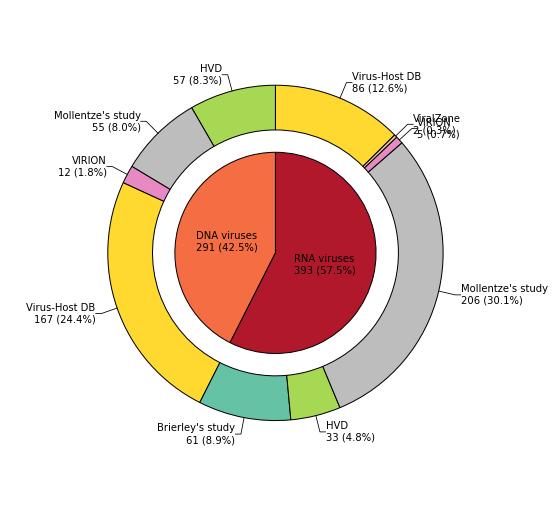

In [7]:
##====== Fig. 2A Baltimore classification and data sources of human-infecting viruses ======##

def fig_pie_data_if_infect_human():
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    
    # ===== 读取数据 =====
    dt = pd.read_excel(
        "../data/dt_for_human_infectivity_baltimore_new.xlsx",
        sheet_name="dt_for_human_infectivity"
    )
    dt_inf = dt[dt["Label_text"] == "infecting human"].copy()
    
    # ===== 汇总数据 =====
    inner = (
        dt_inf.groupby("genome_type_brief")
        .size()
        .reset_index(name="n")
        .sort_values("genome_type_brief")
    )
    outer = (
        dt_inf.groupby(["genome_type_brief", "data_source_db_brief"])
        .size()
        .reset_index(name="n")
        .sort_values(["genome_type_brief", "data_source_db_brief"])
    )
    
    # ===== 配色 =====
    # 内圈红色系（高区分度、Nature风格）
    inner_colors = {
        "DNA viruses": "#F46D43",   # 橙红
        "RNA viruses": "#B2182B",   # 深酒红
    }
    
    # 外圈亮色系（Mollentze 灰色固定）
    outer_palette = [
        "#A6D854", "#8DA0CB", "#E78AC3", "#FFD92F",
        "#66C2A5", "#E5C494", "#B3B3B3"
    ]
    outer_colors = {}
    unique_sources = outer["data_source_db_brief"].unique()
    for i, src in enumerate(unique_sources):
        outer_colors[src] = "#bdbdbd" if "Mollentze" in src else outer_palette[i % len(outer_palette)]

    # 外圈亮色系（Mollentze 灰色固定）
    unique_sources = outer["data_source_db_brief"].unique()
    for i, src in enumerate(unique_sources):
        outer_colors[src] = "#bdbdbd" if "Mollentze" in src else outer_palette[i % len(outer_palette)]
    
    # ===== 绘图 =====
    fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(aspect="equal"))
    
    # ---- 内圈（实心） ----
    inner_vals = inner["n"].values
    inner_labels = [
        f"{row.genome_type_brief}\n{row.n} ({row.n/sum(inner_vals):.1%})"
        for _, row in inner.iterrows()
    ]
    inner_colors_plot = [inner_colors[row.genome_type_brief] for _, row in inner.iterrows()]
    
    wedges1, _ = ax.pie(
        inner_vals,
        labels=None,
        colors=inner_colors_plot,
        startangle=90,
        radius=0.9,      # 实心饼半径
        wedgeprops=dict(width=0.9, edgecolor="black", linewidth=1),
    )
    
    # 内圈标签（写在扇区中）
    for w, label in zip(wedges1, inner_labels):
        ang = (w.theta2 + w.theta1) / 2
        x = 0.45 * np.cos(np.deg2rad(ang))
        y = 0.45 * np.sin(np.deg2rad(ang))
        ax.text(x, y, label, ha="center", va="center", fontsize=10, color="black")
    
    # ---- 外圈（环） ----
    outer_vals = outer["n"].values
    outer_labels = [
        f"{row.data_source_db_brief}\n{row.n} ({row.n/sum(outer_vals):.1%})"
        for _, row in outer.iterrows()
    ]
    outer_colors_plot = [outer_colors[row.data_source_db_brief] for _, row in outer.iterrows()]
    
    wedges2, _ = ax.pie(
        outer_vals,
        labels=None,
        colors=outer_colors_plot,
        startangle=90,
        radius=1.5,
        wedgeprops=dict(width=0.4, edgecolor="black", linewidth=1),
    )
    
    # ---- 外圈折线 + 标签 ----
    for w, label in zip(wedges2, outer_labels):
        ang = (w.theta2 + w.theta1) / 2
        x = np.cos(np.deg2rad(ang))
        y = np.sin(np.deg2rad(ang))
    
        # 引线起点（环外缘）
        r = 1.5
        x0, y0 = r * x, r * y
        # 引线折点
        x1, y1 = (r + 0.15) * x, (r + 0.15) * y
        # 标签端
        horiz_shift = 0.05 if x >= 0 else -0.05
        x2, y2 = x1 + horiz_shift, y1
    
        # 画折线
        ax.plot([x0, x1, x2], [y0, y1, y2], color="black", lw=0.8)
    
        # 标签文字
        ha = "left" if x > 0 else "right"
        ax.text(x2, y2, label, ha=ha, va="center",
                fontsize=10, color="black", wrap=True)
    
    # ---- 美化 ----
    ax.set_xlim(-2.4, 2.4)
    ax.set_ylim(-2.2, 2.2)
    ax.axis("off")
    
    plt.tight_layout()
    plt.savefig("../fig_saved/Fig2B_if_infecting_human_data_pie.pdf",
            format="pdf", 
            dpi=300,  # 高分辨率
            bbox_inches="tight", # 防止内容被裁剪
            pad_inches=0.1)  # 添加少许边距

    plt.show()


if __name__ == "__main__":
    fig_pie_data_if_infect_human()

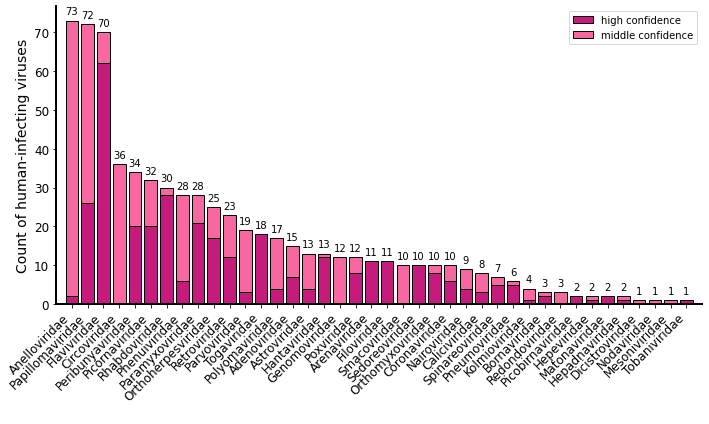

In [ ]:
##====== Fig. 2B Distribution of high- and middle-confidence human-infecting viruses across viral families ======##

def barplot_virus_family():
    import warnings
    warnings.filterwarnings("ignore")

    import pandas as pd
    import matplotlib.pyplot as plt
    

    dt_id_map = pd.read_excel("../data/Supplementary Tables.xlsx", sheet_name="Supplementary Table2", header=1)
    dt_id_map = dt_id_map[dt_id_map["confidence level"].isin(["high", "middle"])].reset_index(drop=True)
    
    # 映射label到文字
    label_map = {"high": "high confidence", "middle": "middle confidence"}
    dt_id_map["Label_text"] = dt_id_map["confidence level"].map(label_map)
    
    # 按family和label统计
    count_df = dt_id_map.groupby(["virus family", "Label_text"]).size().unstack(fill_value=0)

    # 新增：按照总数排序（降序）
    count_df = count_df.loc[count_df.sum(axis=1).sort_values(ascending=False).index]
    
    # 颜色映射
    colors = {
        "high confidence": "#c51b7d",
        "middle confidence": "#f768a1"
    }
    
    # 绘制
    fig, ax = plt.subplots(figsize=(10, 6))
    bottom = None
    bars = {}
    
    for label in ["high confidence", "middle confidence"]:
        bars[label] = ax.bar(
            count_df.index,
            count_df[label],
            bottom=bottom,
            label=label,
            color=colors[label],
            edgecolor="black"
        )
        if bottom is None:
            bottom = count_df[label]
        else:
            bottom = bottom + count_df[label]
    
    # 在每个柱子顶端添加总数
    for i, vfam in enumerate(count_df.index):
        total = count_df.loc[vfam].sum()
        ax.text(i, total + 1, str(total), ha="center", va="bottom", fontsize=10)

    # 美化
    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_linewidth(2)
    ax.spines["bottom"].set_linewidth(2)
    
    ax.set_ylabel("Count of human-infecting viruses", fontsize=14)
    ax.set_xlabel(" ")
    ax.set_xlim(-1, len(count_df.index))
    #ax.set_title("Virus counts per family (infecting vs non-infecting human)")
    ax.legend(title=None, fontsize=10)
    plt.xticks(rotation=45, ha="right", fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    
    plt.savefig("../fig_saved/Fig2B_if_infecting_human_data_component.pdf",
            format="pdf", 
            dpi=300,  # 高分辨率
            bbox_inches="tight", # 防止内容被裁剪
            pad_inches=0.1)  # 添加少许边距
    
    plt.show()


if __name__ == "__main__":
    barplot_virus_family()

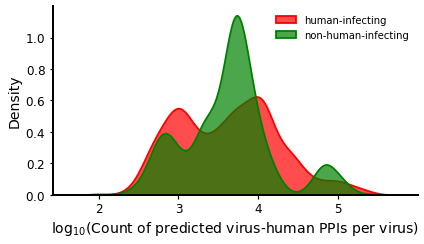

In [ ]:
##====== Fig. 2C Distribution of predicted virus-human PPIs across virus species ======##

def show_ppi_virus_density():
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import matplotlib.ticker as mticker
    import numpy as np

    # ======== 读取数据 ========
    df = pd.read_csv("../data/all_virus_human_ppi_table_threshold999.csv", sep=",", header=0)

    # ======== 读取标签文件（区分human-infecting与non-human-infecting） ========
    dt_binary_matrix_nolabel = pd.read_csv(
        "../data/all_virus_ppi_matrix_threshold999.csv",
        sep=",", header=0, index_col=0
    )
    df_label = pd.read_csv("../data/AllDataIdMapping.csv", sep="\t")
    df_label.rename(columns={"Taxid": "taxid", "Label": "label"}, inplace=True)
    dt_binary_matrix_all = pd.merge(dt_binary_matrix_nolabel, df_label[["label", "taxid"]], on="taxid")

    # ======== 取出感染类型列表 ========
    taxid_label_map = dict(zip(dt_binary_matrix_all["taxid"], dt_binary_matrix_all["label"]))

    # ======== Before & After 数据集（这里只画 Before 的分布） ========
    df_before = df.copy()

    # ======== 计算每个病毒的 PPI 数量 ========
    df_before_counts = df_before.groupby("taxid").size().reset_index(name="ppi_count")
    df_before_counts["label"] = df_before_counts["taxid"].map(taxid_label_map)

    # ======== 删除缺失标签（如部分taxid在标签表中不存在） ========
    df_before_counts = df_before_counts.dropna(subset=["label"])

    # ======== 对ppi_count取log10变换 ========
    df_before_counts["log_ppi"] = np.log10(df_before_counts["ppi_count"] + 1)

    # ======== 绘图 ========
    plt.figure(figsize=(6, 3.5))
    sns.kdeplot(
        data=df_before_counts[df_before_counts["label"] == 1],
        x="log_ppi",
        fill=True,
        color="red",
        alpha=0.7,
        linewidth=1.8,
        label="human-infecting",
        bw_adjust=0.8
    )

    sns.kdeplot(
        data=df_before_counts[df_before_counts["label"] == 0],
        x="log_ppi",
        fill=True,
        color="green",
        alpha=0.7,
        linewidth=1.8,
        label="non-human-infecting",
        bw_adjust=0.8
    )

    # ======== 坐标轴与外观设置 ========
    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_linewidth(2)
    ax.spines["bottom"].set_linewidth(2)

    ax.tick_params(axis="both", labelsize=12, width=1.2)
    ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis="y", style="sci", scilimits=(-2, 2))

    plt.xlabel("log$_{10}$(Count of predicted virus-human PPIs per virus)", fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.legend(loc="upper right", frameon=False, fontsize=10)
    plt.tight_layout()
    
    plt.savefig(
        "../fig_saved/Supple_Fig2_v4_ppi_density_log10.pdf",
        format="pdf",
        dpi=300,
        bbox_inches="tight",
        pad_inches=0.1,
    )
    
    plt.show()


if __name__ == "__main__":
    show_ppi_virus_density()


1 [ 0.99569153 -0.45698301]
2 [0.62343127 0.88102945]


Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


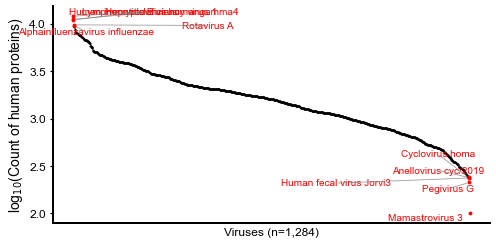

In [ ]:
##====== Fig. 2D Distribution of human proteins predicted to interact with viruses across virus species ======##

def plot_virus_human_protein_line_with_inset():
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    from adjustText import adjust_text   # ⚠️ pip install adjustText

    # ======== 1. 读取互作表 ========
    df_ppi = pd.read_csv("../data/all_virus_human_ppi_table_threshold999.csv", sep=",", header=0)

    # ======== 2. 读取病毒信息（学名） ========
    df_meta = pd.read_csv("../data/AllDataIdMapping.csv", sep="\t")
    df_meta.rename(columns={"Taxid": "taxid", "Species":"VirusName"}, inplace=True)
    df_meta["taxid"] = df_meta["taxid"].astype(str)

    # ======== 3. 统计 unique human proteins 数量 ========
    df_ppi["taxid"] = df_ppi["taxid"].astype(str)
    df_unique = (
        df_ppi.drop_duplicates(subset=["taxid", "human_prot_id"])
        .groupby("taxid")["human_prot_id"]
        .nunique()
        .reset_index(name="num_unique_human_proteins")
    )

    # ======== 4. 合并病毒学名 ========
    df = pd.merge(df_unique, df_meta[["taxid", "VirusName"]], on="taxid", how="left")
    df["VirusName"] = df["VirusName"].fillna(df["taxid"]).str.replace("_", " ")

    # ======== 5. 排序 + log10转换 ========
    df = df.sort_values("num_unique_human_proteins", ascending=False).reset_index(drop=True)
    df["log10_num"] = np.log10(df["num_unique_human_proteins"] + 1)
    df["rank"] = np.arange(1, len(df) + 1)
    n_total = len(df)

    # ======== 6. 前5 + 后5 标注 ========
    top5 = df.head(5)
    bottom5 = df.tail(5)
    highlight_ids = set(top5["taxid"].tolist() + bottom5["taxid"].tolist())

    # ======== 7. 主图绘制 ========
    fig, ax = plt.subplots(figsize=(7, 3.5))
    sns.set_style("white")

    # 折线 + 点
    #ax.plot(df["rank"], df["log10_num"], color="black", linewidth=1)
    ax.scatter(df["rank"], df["log10_num"], color="black", s=1, zorder=2)

    # 红色高亮点
    highlight_df = df[df["taxid"].isin(highlight_ids)]
    ax.scatter(highlight_df["rank"], highlight_df["log10_num"], color="red", s=8, zorder=4)

    # 标签（自动错开）
    texts = []
    for _, row in highlight_df.iterrows():
        texts.append(
            ax.text(
                row["rank"], row["log10_num"],
                row["VirusName"],
                fontsize=10, ha="center", va="bottom", color="red"
            )
        )
    adjust_text(
        texts,
        arrowprops=dict(arrowstyle="-", color="gray", lw=0.8, alpha=0.8),
        expand_points=(1.3, 1.4),
        expand_text=(1.2, 1.4),
        force_points=0.25,
        force_text=0.3
    )

    # ======== 8. 主图格式 ========
    ax.set_xlabel(f"Viruses (n={n_total:,})", fontsize=12)
    ax.set_ylabel("log$_{10}$(Count of human proteins)", fontsize=14)

    ax.set_xticks([])
    ax.tick_params(axis="y", labelsize=12, width=1.2)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_linewidth(2)
    ax.spines["bottom"].set_linewidth(2)
    ax.figure.patch.set_facecolor("white")

    # ======== 9. 保存输出 ========
    plt.tight_layout()
    plt.savefig("../fig_saved/Fig_virus_unique_human_proteins_line_log10.pdf",
                dpi=300, bbox_inches="tight")
    plt.show()


if __name__ == "__main__":
    plot_virus_human_protein_line_with_inset()


(40, 5)


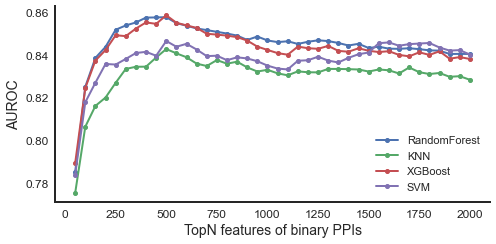

In [ ]:
##====== Fig. 2E Validation AUROC across different combinations of machine learning algorithms and the top N (N=50, 100, …, 2000) binary PPI features during feature selection ======##

import pandas as pd
import matplotlib.pyplot as plt

def select_topN_features_on_mydataset():
    # 读取Excel文件
    df = pd.read_excel('../data/summary_plot_binary_ppi.xlsx')
    print(df.shape)
    # 设置画布大小
    plt.figure(figsize=(7,3.5))
    
    # 图例映射字典
    label_map = {
        "RF": "RandomForest",
        "XGBOOST": "XGBoost",
        "KNN": "KNN",
        "SVM": "SVM"
    }
    
    # 科研 风格配色
    colors = {
        "RF": "#4C72B0",      # 蓝
        "XGBOOST": "#C44E52", # 红
        "KNN": "#55A868",     # 绿
        "SVM": "#8172B3"      # 紫
    }
    
    # 绘制每一列（除了top列）对应的折线图
    for col in df.columns[1:]:
        name = col.replace('_auc', '').upper()
        label = label_map.get(name, name)
        plt.plot(
            df['top'], df[col], marker='o',
            label=label, markersize=4, linewidth=2,
            color=colors.get(name, None)  # 使用配色
        )
    
    # 设置坐标轴标签和标题
    plt.xlabel('TopN features of binary PPIs', fontsize=14)
    plt.ylabel('AUROC', fontsize=14)
    
    # 调大刻度字体
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # 去掉上方和右侧的框线，加粗左侧和下方
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    
    # 图例字体调大
    plt.legend(fontsize=11, frameon=False)  # 去掉图例边框
    
    plt.tight_layout()

    plt.savefig("../fig_saved/Fig2C_TopN_test_on_mydataset.pdf",
            format="pdf", 
            dpi=300,  # 高分辨率
            bbox_inches="tight", # 防止内容被裁剪
            pad_inches=0.1)  # 添加少许边距
    
    plt.show()


if __name__ == "__main__":
    select_topN_features_on_mydataset()


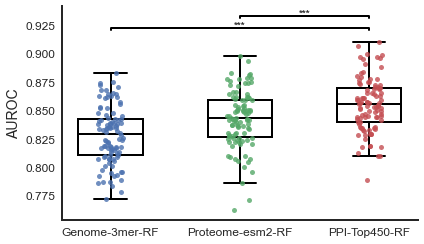

P-values vs PPI-Top450-RF:
Genome-3mer-RF: 1.7582e-13
Proteome-esm2-RF: 3.0148e-04


In [13]:
##====== Fig. 2F Comparison of test AUROC among the best genome-, proteome-, and PPI-based models ======##

def boxplot_test_auroc_mydataset():
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy.stats import ttest_ind
    
    df = pd.read_excel("../data/result_for_figure.xlsx", sheet_name="mydataset_test_auroc", header=0)
    df_long = df.melt(var_name="Method", value_name="Value")
    
    # 手动指定顺序
    order = ["Genome-3mer-RF","Proteome-esm2-RF","PPI-Top450-RF"]
    colors = {
        "Genome-3mer-RF": "#4C72B0",   # 蓝
        "Proteome-esm2-RF": "#55A868", # 绿
        "PPI-Top450-RF": "#C44E52"     # 红
    }
    
    # ========== 绘图 ==========
    plt.figure(figsize=(6,3.5))
    
    # 箱线图（无填充，黑边框）
    sns.boxplot(
        data=df_long, x="Method", y="Value",
        order=order, width=0.5, showfliers=False,
        boxprops=dict(facecolor="white", edgecolor="black", linewidth=2),
        whiskerprops=dict(linewidth=2, color="black"),
        capprops=dict(linewidth=2, color="black"),
        medianprops=dict(color="black", linewidth=2)
    )
    
    # 散点（按方法上色）
    for method in order:
        subset = df_long[df_long["Method"] == method]
        sns.stripplot(
            data=subset, x="Method", y="Value",
            order=order, jitter=True, size=5, alpha=0.8,
            color=colors[method]
        )
    
    plt.xticks(rotation=0, fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel("AUROC", fontsize=14)
    plt.xlabel("")

    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_linewidth(2)
    ax.spines["bottom"].set_linewidth(2)
    
    # ========== 显著性检验 ==========
    ref = "PPI-Top450-RF"
    groups = ["Genome-3mer-RF", "Proteome-esm2-RF"]
    
    p_values = {}
    for g in groups:
        vals1 = df[g].dropna()
        vals2 = df[ref].dropna()
        stat, p = ttest_ind(vals1, vals2)
        p_values[g] = p
    
    # ========== 在图上标注显著性 ==========
    y_max = df_long["Value"].max()
    height = (df_long["Value"].max() - df_long["Value"].min()) * 0.07  # 拉大间距
    offset = height * 0.4
    
    for i, g in enumerate(groups):
        x1 = order.index(g)
        x2 = order.index(ref)
        y = y_max + (i+1)*height  # 每组往上叠加更多空间
        p = p_values[g]
    
        # 横线
        plt.plot([x1, x1, x2, x2], [y, y+0.002, y+0.002, y], lw=2, color="black")
    
        # 显著性标记
        if p < 0.001:
            text = "***"
        elif p < 0.01:
            text = "**"
        elif p < 0.05:
            text = "*"
        else:
            text = "ns"
    
        plt.text((x1+x2)/2, y+0.00005, text, ha="center", va="bottom", fontsize=10, fontweight='bold')
    
    plt.tight_layout()

    plt.savefig("../fig_saved/Fig2D_method_compare_test_on_mydataset.pdf",
            format="pdf", 
            dpi=300,  # 高分辨率
            bbox_inches="tight", # 防止内容被裁剪
            pad_inches=0.1)  # 添加少许边距
    
    plt.show()
    
    # 打印具体 p 值
    print("P-values vs PPI-Top450-RF:")
    for k,v in p_values.items():
        print(f"{k}: {v:.4e}")


if __name__ == "__main__":
    boxplot_test_auroc_mydataset()


In [ ]:
##====== Fig. 2E, F g. GO-BP term clusters related to viral processes (G) OR immune processes (H) among the top 450 human proteins contributing to infectivity prediction ======##

## see codeForFig2EF.R

## Fig. 3 Comparison of PPI- and Sequence-based models for predicting transmissibility, transmission route, and tissue tropism of RNA viruses.

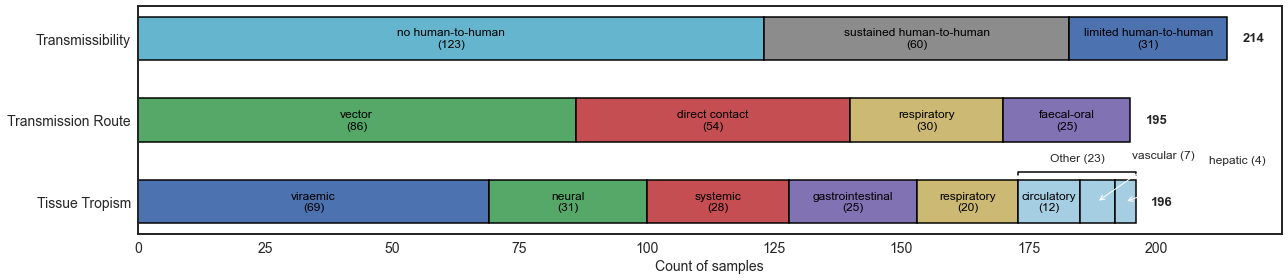

In [14]:
##====== Fig. 3A Components of RNA viruses used for predicting the three phenotypes ======##

import pandas as pd
import matplotlib.pyplot as plt
import textwrap

def show_data_components():
    # 读取数据
    dt = pd.read_excel("../data/data_components.xlsx", sheet_name="data_components", header=0)
    dt = dt[dt["Group"]!="Virulence"].reset_index(drop=True)

    # 替换 Infectivity → Transmissibility
    dt["Group"] = dt["Group"].replace({"Infectivity": "Transmissibility"})

    # Group 内部 Count 从大到小
    dt = dt.sort_values(by=["Group", "Count"], ascending=[True, False])

    # 计算每个 Group 的总数
    group_totals = dt.groupby("Group")["Count"].sum()
    
    # ========== 颜色设置（Nature风格） ==========
    nature_colors = [
        "#4C72B0",  # 蓝
        "#55A868",  # 绿
        "#C44E52",  # 红
        "#8172B3",  # 紫
        "#CCB974",  # 黄褐
        "#64B5CD",  # 青蓝
        "#8C8C8C"   # 灰
    ]

    label_colors = {}
    color_idx = 0
    for _, row in dt.iterrows():
        group = row["Group"]
        label = row["Label"]
        if group == "Tissue Tropism" and label in ["circulatory", "vascular", "hepatic"]:
            label_colors[label] = "#a6cee3"  # 特殊浅蓝色
        else:
            if label not in label_colors:
                label_colors[label] = nature_colors[color_idx % len(nature_colors)]
                color_idx += 1

    # ========== 绘图 ==========
    fig, ax = plt.subplots(figsize=(18, 4))

    # 固定顺序
    groups_order = ["Tissue Tropism", "Transmission Route", "Transmissibility"]
    groups = [g for g in groups_order if g in dt["Group"].unique()]
    y_positions = {g: i*1.5 for i, g in enumerate(groups)}
    bottoms = {g: 0 for g in groups}

    # 保存 circulatory/vascular/hepatic 的区间范围
    special_xmin, special_xmax, special_sum = None, None, 0

    for _, row in dt.iterrows():
        group = row["Group"]
        label = row["Label"]
        count = row["Count"]

        ax.barh(y_positions[group], count, left=bottoms[group],
                edgecolor="black", linewidth=1.5, color=label_colors[label])

        # circulatory 保留在柱子内部显示
        if not (group == "Tissue Tropism" and label in ["vascular", "hepatic"]):
            wrapped_label = "\n".join(textwrap.wrap(label, width=30))
            ax.text(
                bottoms[group] + count / 2,
                y_positions[group],
                f"{wrapped_label}\n({count})",
                ha="center", va="center", fontsize=12, color="black"
            )

        if group == "Tissue Tropism" and label in ["circulatory", "vascular", "hepatic"]:
            if special_xmin is None:
                special_xmin = bottoms[group]
            special_xmax = bottoms[group] + count
            special_sum += count

        bottoms[group] += count

    # 在柱子顶端写总数
    for group, total in group_totals.items():
        ax.text(
            total + 3, y_positions[group], str(total),
            ha="left", va="center", fontsize=13, fontweight="bold"
        )

    # ========== 特殊 annotation ==========
    vascular_row = dt[(dt["Group"]=="Tissue Tropism") & (dt["Label"]=="vascular")].iloc[0]
    hepatic_row = dt[(dt["Group"]=="Tissue Tropism") & (dt["Label"]=="hepatic")].iloc[0]

    vascular_x = group_totals["Tissue Tropism"] - hepatic_row["Count"] - vascular_row["Count"]/2
    hepatic_x = group_totals["Tissue Tropism"] - hepatic_row["Count"]/2
    y_tissue = y_positions["Tissue Tropism"]

    ax.annotate(
        f"vascular ({vascular_row['Count']})",
        xy=(vascular_x, y_tissue),
        xytext=(vascular_x+13, (y_positions["Tissue Tropism"]+y_positions["Transmissibility"])/2-0.7),
        ha="center", fontsize=12,
        arrowprops=dict(arrowstyle="->", lw=1)
    )

    ax.annotate(
        f"hepatic ({hepatic_row['Count']})",
        xy=(hepatic_x, y_tissue),
        xytext=(hepatic_x+22, (y_positions["Tissue Tropism"]+y_positions["Transmissibility"])/2-0.8),
        ha="center", fontsize=12,
        arrowprops=dict(arrowstyle="->", lw=1)
    )

    # ========== 括号 + Other ==========
    if special_xmin is not None and special_xmax is not None:
        y_mid = (y_positions["Transmission Route"] + y_positions["Tissue Tropism"]) / 2-0.25
        y_offset = 0.1

        ax.plot([special_xmin, special_xmin, special_xmax, special_xmax],
                [y_mid, y_mid + y_offset-0.05, y_mid + y_offset-0.05, y_mid],
                color="black", lw=1.5)

        ax.text((special_xmin + special_xmax)/2, y_mid + y_offset+0.29,
                f"Other ({special_sum})",
                ha="center", va="top", fontsize=12)

    # 美化
    ax.set_xlabel("Count of samples", fontsize=14)
    ax.tick_params(axis='x', labelsize=14)
    ax.set_yticks(list(y_positions.values()))
    ax.set_yticklabels(list(y_positions.keys()), fontsize=14)

    # 坐标轴线加粗
    for spine in ax.spines.values():
        spine.set_linewidth(2)

    plt.tight_layout()

    plt.savefig("../fig_saved/Fig3A_phenotypes_pred_data_component.v2.pdf",
            format="pdf", 
            dpi=300,  # 高分辨率
            bbox_inches="tight", # 防止内容被裁剪
            pad_inches=0.1)  # 添加少许边距
    
    plt.show()



if __name__ == "__main__":
    show_data_components()


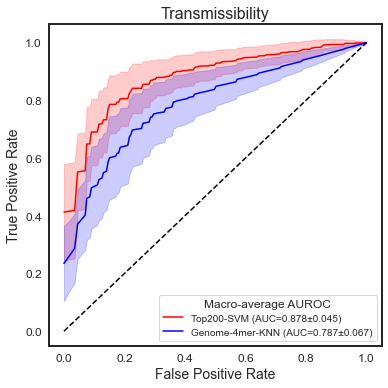

In [ ]:
##====== Fig. 3B-D Test macro-AUROC comparisons between PPI- and genome-based models for transmissibility (B), transmission route (C), and tissue tropism (D) ======##

import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import glob


#### Fig. 3B transmissibility AUROC
def compute_macro_roc(file, classes, prob_cols, fpr_grid):
    df = pd.read_csv(file)
    
    # one-hot 编码
    y_true = label_binarize(df["true"], classes=classes)
    y_score = df[prob_cols].values
    
    # 每个类别算 ROC
    tprs = []
    aucs = []
    for i in range(len(classes)):
        fpr, tpr, _ = roc_curve(y_true[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        # 插值到统一的 fpr_grid
        tprs.append(np.interp(fpr_grid, fpr, tpr))
    # 取类别平均
    mean_tpr = np.mean(tprs, axis=0)
    macro_auc = np.mean(aucs)
    return mean_tpr, macro_auc



def compute_group_curves(file_list, classes, prob_cols, fpr_grid):
    tpr_list, auc_list = [], []
    for file in file_list:
        mean_tpr, macro_auc = compute_macro_roc(file, classes, prob_cols, fpr_grid)
        tpr_list.append(mean_tpr)
        auc_list.append(macro_auc)
    # 计算平均和方差
    mean_tpr = np.mean(tpr_list, axis=0)
    std_tpr = np.std(tpr_list, axis=0)
    mean_auc = np.mean(auc_list)
    std_auc = np.std(auc_list)
    return mean_tpr, std_tpr, mean_auc, std_auc


def macro_auroc_transmissibility():
    # ========= 参数 =========
    classes = [2,3,4]
    prob_cols = ["prob_2","prob_3","prob_4"]
    
    fpr_grid = np.linspace(0, 1, 200)
    
    # ========= 文件列表 =========
    exp_files = glob.glob("../data/transmissibility/ppibased/top200_probs_split*.csv")   # 实验组100个文件
    ctrl_files = glob.glob("../data/transmissibility/genomebased/probs_split*.csv")     # 对照组100个文件
    
    # ========= 计算 =========
    exp_mean_tpr, exp_std_tpr, exp_mean_auc, exp_std_auc = compute_group_curves(exp_files, classes, prob_cols, fpr_grid)
    ctrl_mean_tpr, ctrl_std_tpr, ctrl_mean_auc, ctrl_std_auc = compute_group_curves(ctrl_files, classes, prob_cols, fpr_grid)
    
    # ========= 绘图 =========
    plt.figure(figsize=(5.5,5.5))
    # 实验组
    plt.plot(fpr_grid, exp_mean_tpr, color="red", label=f"Top200-SVM (AUC={exp_mean_auc:.3f}±{exp_std_auc:.3f})")
    plt.fill_between(fpr_grid, exp_mean_tpr-exp_std_tpr, exp_mean_tpr+exp_std_tpr, color="red", alpha=0.2)
    # 对照组
    plt.plot(fpr_grid, ctrl_mean_tpr, color="blue", label=f"Genome-4mer-KNN (AUC={ctrl_mean_auc:.3f}±{ctrl_std_auc:.3f})")
    plt.fill_between(fpr_grid, ctrl_mean_tpr-ctrl_std_tpr, ctrl_mean_tpr+ctrl_std_tpr, color="blue", alpha=0.2)
    
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("False Positive Rate", fontsize=14)
    plt.xticks(fontsize=12)
    plt.ylabel("True Positive Rate", fontsize=14)
    plt.yticks(fontsize=12)
    plt.legend(loc="lower right", title="Macro-average AUROC", fontsize=10, title_fontsize=12)
    
    plt.title("Transmissibility", fontsize=16)

    ax = plt.gca()    
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)  
    ax.spines['top'].set_linewidth(2)   
    ax.spines['right'].set_linewidth(2) 
    
    plt.tight_layout()

    plt.savefig("../fig_saved/Fig3B_2_transmissibility_auroc.pdf",
        format="pdf", 
        dpi=300,  # 高分辨率
        bbox_inches="tight", # 防止内容被裁剪
        pad_inches=0.1)  # 添加少许边距
    
    plt.show()

    

if __name__ == "__main__":
    macro_auroc_transmissibility()
    


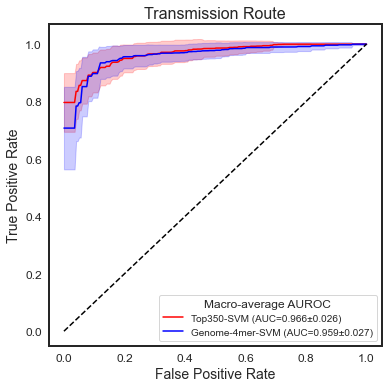

In [17]:
##====== Fig. 3C Transmission Route AUROC

import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import glob


def compute_macro_roc(file, classes, prob_cols, fpr_grid):
    df = pd.read_csv(file)
    
    # one-hot 编码
    y_true = label_binarize(df["true"], classes=classes)
    y_score = df[prob_cols].values
    
    # 每个类别算 ROC
    tprs = []
    aucs = []
    for i in range(len(classes)):
        fpr, tpr, _ = roc_curve(y_true[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        # 插值到统一的 fpr_grid
        tprs.append(np.interp(fpr_grid, fpr, tpr))
    # 取类别平均
    mean_tpr = np.mean(tprs, axis=0)
    macro_auc = np.mean(aucs)
    return mean_tpr, macro_auc

def compute_group_curves(file_list, classes, prob_cols, fpr_grid):
    tpr_list, auc_list = [], []
    for file in file_list:
        mean_tpr, macro_auc = compute_macro_roc(file, classes, prob_cols, fpr_grid)
        tpr_list.append(mean_tpr)
        auc_list.append(macro_auc)
    # 计算平均和方差
    mean_tpr = np.mean(tpr_list, axis=0)
    std_tpr = np.std(tpr_list, axis=0)
    mean_auc = np.mean(auc_list)
    std_auc = np.std(auc_list)
    return mean_tpr, std_tpr, mean_auc, std_auc


def macro_auroc_transmission_route():
    # ========= 参数 =========
    classes = ["direct contact", "faecal-oral", "respiratory", "vector"]
    prob_cols = ["prob_direct contact", "prob_faecal-oral", "prob_respiratory", "prob_vector"]
    
    fpr_grid = np.linspace(0, 1, 200)
    
    # ========= 文件列表 =========
    exp_files = glob.glob("../data/transmission_route/ppibased/top350_probs_split*.csv")   # 实验组100个文件
    ctrl_files = glob.glob("../data/transmission_route/genomebased/probs_split*.csv")     # 对照组100个文件
    
    # ========= 计算 =========
    exp_mean_tpr, exp_std_tpr, exp_mean_auc, exp_std_auc = compute_group_curves(exp_files, classes, prob_cols, fpr_grid)
    ctrl_mean_tpr, ctrl_std_tpr, ctrl_mean_auc, ctrl_std_auc = compute_group_curves(ctrl_files, classes, prob_cols, fpr_grid)
    
    # ========= 绘图 =========
    plt.figure(figsize=(5.5,5.5))
    # 实验组
    plt.plot(fpr_grid, exp_mean_tpr, color="red", label=f"Top350-SVM (AUC={exp_mean_auc:.3f}±{exp_std_auc:.3f})")
    plt.fill_between(fpr_grid, exp_mean_tpr-exp_std_tpr, exp_mean_tpr+exp_std_tpr, color="red", alpha=0.2)
    # 对照组
    plt.plot(fpr_grid, ctrl_mean_tpr, color="blue", label=f"Genome-4mer-SVM (AUC={ctrl_mean_auc:.3f}±{ctrl_std_auc:.3f})")
    plt.fill_between(fpr_grid, ctrl_mean_tpr-ctrl_std_tpr, ctrl_mean_tpr+ctrl_std_tpr, color="blue", alpha=0.2)
    
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("False Positive Rate", fontsize=14)
    plt.xticks(fontsize=12)
    plt.ylabel("True Positive Rate", fontsize=14)
    plt.yticks(fontsize=12)
    plt.legend(loc="lower right", title="Macro-average AUROC", fontsize=10, title_fontsize=12)
    
    plt.title("Transmission Route", fontsize=16)

    ax = plt.gca()    
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)  
    ax.spines['top'].set_linewidth(2)   
    ax.spines['right'].set_linewidth(2) 
    
    plt.tight_layout()

    plt.savefig("../fig_saved/Fig3B_3_transmission_route_auroc.pdf",
            format="pdf", 
            dpi=300,  # 高分辨率
            bbox_inches="tight", # 防止内容被裁剪
            pad_inches=0.1)  # 添加少许边距
    
    plt.show()


if __name__ == "__main__":
    macro_auroc_transmission_route()


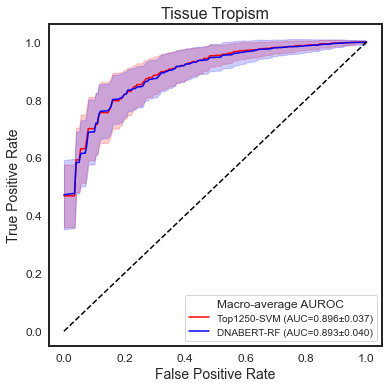

In [ ]:
##====== Fig. 3D Tissue Tropism AUROC

import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import glob


def compute_macro_roc(file, classes, prob_cols, fpr_grid):
    df = pd.read_csv(file)
    
    # one-hot 编码
    y_true = label_binarize(df["true"], classes=classes)
    y_score = df[prob_cols].values
    
    # 每个类别算 ROC
    tprs = []
    aucs = []
    for i in range(len(classes)):
        fpr, tpr, _ = roc_curve(y_true[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        # 插值到统一的 fpr_grid
        tprs.append(np.interp(fpr_grid, fpr, tpr))
    # 取类别平均
    mean_tpr = np.mean(tprs, axis=0)
    macro_auc = np.mean(aucs)
    return mean_tpr, macro_auc

def compute_group_curves(file_list, classes, prob_cols, fpr_grid):
    tpr_list, auc_list = [], []
    for file in file_list:
        mean_tpr, macro_auc = compute_macro_roc(file, classes, prob_cols, fpr_grid)
        tpr_list.append(mean_tpr)
        auc_list.append(macro_auc)
    # 计算平均和方差
    mean_tpr = np.mean(tpr_list, axis=0)
    std_tpr = np.std(tpr_list, axis=0)
    mean_auc = np.mean(auc_list)
    std_auc = np.std(auc_list)
    return mean_tpr, std_tpr, mean_auc, std_auc


def macro_auroc_tissue_tropism():
    # ========= 参数 =========
    classes = [0,1,2,3,4,5]
    prob_cols = ["prob_gastrointestinal", "prob_neural", "prob_other", "prob_respiratory", "prob_systemic", "prob_viraemic"]
    
    fpr_grid = np.linspace(0, 1, 200)
    
    # ========= 文件列表 =========
    exp_files = glob.glob("../data/tissue_tropism/ppibased/top1250_probs_split*.csv")   # 实验组100个文件
    ctrl_files = glob.glob("../data/tissue_tropism/genomebased/probs_split*.csv")     # 对照组100个文件
    
    # ========= 计算 =========
    exp_mean_tpr, exp_std_tpr, exp_mean_auc, exp_std_auc = compute_group_curves(exp_files, classes, prob_cols, fpr_grid)
    ctrl_mean_tpr, ctrl_std_tpr, ctrl_mean_auc, ctrl_std_auc = compute_group_curves(ctrl_files, classes, prob_cols, fpr_grid)
    
    # ========= 绘图 =========
    plt.figure(figsize=(5.5,5.5))
    # 实验组
    plt.plot(fpr_grid, exp_mean_tpr, color="red", label=f"Top1250-SVM (AUC={exp_mean_auc:.3f}±{exp_std_auc:.3f})")
    plt.fill_between(fpr_grid, exp_mean_tpr-exp_std_tpr, exp_mean_tpr+exp_std_tpr, color="red", alpha=0.2)
    # 对照组
    plt.plot(fpr_grid, ctrl_mean_tpr, color="blue", label=f"DNABERT-RF (AUC={ctrl_mean_auc:.3f}±{ctrl_std_auc:.3f})")
    plt.fill_between(fpr_grid, ctrl_mean_tpr-ctrl_std_tpr, ctrl_mean_tpr+ctrl_std_tpr, color="blue", alpha=0.2)
    
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("False Positive Rate", fontsize=14)
    plt.xticks(fontsize=12)
    plt.ylabel("True Positive Rate", fontsize=14)
    plt.yticks(fontsize=12)
    plt.legend(loc="lower right", title="Macro-average AUROC", fontsize=10, title_fontsize=12)
    
    plt.title("Tissue Tropism", fontsize=16)

    ax = plt.gca()    
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)  
    ax.spines['top'].set_linewidth(2)   
    ax.spines['right'].set_linewidth(2) 
    
    plt.tight_layout()

    plt.savefig("../fig_saved/Fig3B_4_tissue_tropism_auroc.pdf",
        format="pdf", 
        dpi=300,  # 高分辨率
        bbox_inches="tight", # 防止内容被裁剪
        pad_inches=0.1)  # 添加少许边距
    
    plt.show()



if __name__ == "__main__":
    macro_auroc_tissue_tropism()


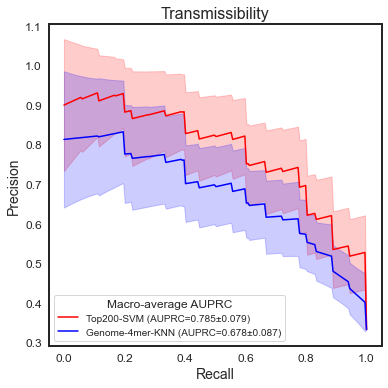

In [ ]:
##====== Fig. 3E-G Test macro-AUPRC comparisons between PPI- and genome-based models for transmissibility (E), transmission route (F), and tissue tropism (G) ======##


####==== Fig. 3E transmissibility AUPRC
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import glob


def compute_macro_pr(file, classes, prob_cols, recall_grid):
    df = pd.read_csv(file)

    # one-hot 编码
    y_true = label_binarize(df["true"], classes=classes)
    y_score = df[prob_cols].values

    # 每个类别算 PR
    precisions = []
    aucs = []
    for i in range(len(classes)):
        precision, recall, _ = precision_recall_curve(y_true[:, i], y_score[:, i])
        pr_auc = auc(recall, precision)
        aucs.append(pr_auc)
        # recall 递增，反转后插值
        precision_interp = np.interp(recall_grid, recall[::-1], precision[::-1])
        precisions.append(precision_interp)

    # 取类别平均
    mean_prec = np.mean(precisions, axis=0)
    macro_auc = np.mean(aucs)
    return mean_prec, macro_auc

def compute_group_curves(file_list, classes, prob_cols, recall_grid):
    prec_list, auc_list = [], []
    for file in file_list:
        mean_prec, macro_auc = compute_macro_pr(file, classes, prob_cols, recall_grid)
        prec_list.append(mean_prec)
        auc_list.append(macro_auc)
    # 计算平均和方差
    mean_prec = np.mean(prec_list, axis=0)
    std_prec = np.std(prec_list, axis=0)
    mean_auc = np.mean(auc_list)
    std_auc = np.std(auc_list)
    return mean_prec, std_prec, mean_auc, std_auc

def macro_auprc_transmissibility():
    # ========= 参数 =========
    classes = [2,3,4]
    prob_cols = ["prob_2","prob_3","prob_4"]

    recall_grid = np.linspace(0, 1, 200)

    # ========= 文件列表 =========
    exp_files = glob.glob("../data/transmissibility/ppibased/top200_probs_split*.csv")   # 实验组100个文件
    ctrl_files = glob.glob("../data/transmissibility/genomebased/probs_split*.csv")     # 对照组100个文件

    # ========= 计算 =========
    exp_mean_prec, exp_std_prec, exp_mean_auc, exp_std_auc = compute_group_curves(exp_files, classes, prob_cols, recall_grid)
    ctrl_mean_prec, ctrl_std_prec, ctrl_mean_auc, ctrl_std_auc = compute_group_curves(ctrl_files, classes, prob_cols, recall_grid)

    # ========= 绘图 =========
    plt.figure(figsize=(5.5,5.5))
    # 实验组
    plt.plot(recall_grid, exp_mean_prec, color="red", 
             label=f"Top200-SVM (AUPRC={exp_mean_auc:.3f}±{exp_std_auc:.3f})")
    plt.fill_between(recall_grid, exp_mean_prec-exp_std_prec, exp_mean_prec+exp_std_prec, 
                     color="red", alpha=0.2)
    # 对照组
    plt.plot(recall_grid, ctrl_mean_prec, color="blue", 
             label=f"Genome-4mer-KNN (AUPRC={ctrl_mean_auc:.3f}±{ctrl_std_auc:.3f})")
    plt.fill_between(recall_grid, ctrl_mean_prec-ctrl_std_prec, ctrl_mean_prec+ctrl_std_prec, 
                     color="blue", alpha=0.2)

    plt.xlabel("Recall", fontsize=14)
    plt.xticks(fontsize=12)
    plt.ylabel("Precision", fontsize=14)
    plt.yticks(fontsize=12)
    plt.legend(loc="lower left", title="Macro-average AUPRC", fontsize=10, title_fontsize=12)

    plt.title("Transmissibility", fontsize=16)

    ax = plt.gca()    
    for spine in ax.spines.values():
        spine.set_linewidth(2)

    plt.tight_layout()

    plt.savefig("../fig_saved/Fig3B_2_transmissibility_auprc.pdf",
        format="pdf", 
        dpi=300,  # 高分辨率
        bbox_inches="tight", # 防止内容被裁剪
        pad_inches=0.1)  # 添加少许边距
    
    plt.show()


if __name__ == "__main__":
    macro_auprc_transmissibility()


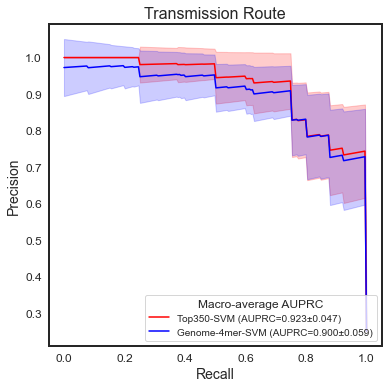

In [18]:
##====== Fig. 3F Transmission Route AUPRC

import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import glob


def compute_macro_pr(file, classes, prob_cols, recall_grid):
    df = pd.read_csv(file)

    # one-hot 编码
    y_true = label_binarize(df["true"], classes=classes)
    y_score = df[prob_cols].values

    # 每个类别算 PR
    precisions = []
    aucs = []
    for i in range(len(classes)):
        precision, recall, _ = precision_recall_curve(y_true[:, i], y_score[:, i])
        pr_auc = auc(recall, precision)
        aucs.append(pr_auc)
        # 注意 recall 要递增，反转后插值
        precision_interp = np.interp(recall_grid, recall[::-1], precision[::-1])
        precisions.append(precision_interp)

    # 取类别平均
    mean_prec = np.mean(precisions, axis=0)
    macro_auc = np.mean(aucs)
    return mean_prec, macro_auc

def compute_group_curves(file_list, classes, prob_cols, recall_grid):
    prec_list, auc_list = [], []
    for file in file_list:
        mean_prec, macro_auc = compute_macro_pr(file, classes, prob_cols, recall_grid)
        prec_list.append(mean_prec)
        auc_list.append(macro_auc)

    # 计算平均和方差
    mean_prec = np.mean(prec_list, axis=0)
    std_prec = np.std(prec_list, axis=0)
    mean_auc = np.mean(auc_list)
    std_auc = np.std(auc_list)
    return mean_prec, std_prec, mean_auc, std_auc

def macro_auprc_transmission_route():
    # ========= 参数 =========
    classes = ["direct contact", "faecal-oral", "respiratory", "vector"]
    prob_cols = ["prob_direct contact", "prob_faecal-oral", "prob_respiratory", "prob_vector"]

    recall_grid = np.linspace(0, 1, 200)

    # ========= 文件列表 =========
    exp_files = glob.glob("../data/transmission_route/ppibased/top350_probs_split*.csv")   # 实验组100个文件
    ctrl_files = glob.glob("../data/transmission_route/genomebased/probs_split*.csv") # 对照组100个文件

    # ========= 计算 =========
    exp_mean_prec, exp_std_prec, exp_mean_auc, exp_std_auc = compute_group_curves(exp_files, classes, prob_cols, recall_grid)
    ctrl_mean_prec, ctrl_std_prec, ctrl_mean_auc, ctrl_std_auc = compute_group_curves(ctrl_files, classes, prob_cols, recall_grid)

    # ========= 绘图 =========
    plt.figure(figsize=(5.5, 5.5))

    # 实验组
    plt.plot(recall_grid, exp_mean_prec, color="red",
             label=f"Top350-SVM (AUPRC={exp_mean_auc:.3f}±{exp_std_auc:.3f})")
    plt.fill_between(recall_grid, exp_mean_prec - exp_std_prec, exp_mean_prec + exp_std_prec,
                     color="red", alpha=0.2)

    # 对照组
    plt.plot(recall_grid, ctrl_mean_prec, color="blue",
             label=f"Genome-4mer-SVM (AUPRC={ctrl_mean_auc:.3f}±{ctrl_std_auc:.3f})")
    plt.fill_between(recall_grid, ctrl_mean_prec - ctrl_std_prec, ctrl_mean_prec + ctrl_std_prec,
                     color="blue", alpha=0.2)

    plt.xlabel("Recall", fontsize=14)
    plt.xticks(fontsize=12)
    plt.ylabel("Precision", fontsize=14)
    plt.yticks(fontsize=12)
    plt.legend(loc="lower right", title="Macro-average AUPRC", fontsize=10, title_fontsize=12)

    plt.title("Transmission Route", fontsize=16)

    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_linewidth(2)

    plt.tight_layout()

    plt.savefig("../fig_saved/Fig3B_3_transmission_route_auprc.pdf",
        format="pdf", 
        dpi=300,  # 高分辨率
        bbox_inches="tight", # 防止内容被裁剪
        pad_inches=0.1)  # 添加少许边距
        
    plt.show()

if __name__ == "__main__":
    macro_auprc_transmission_route()



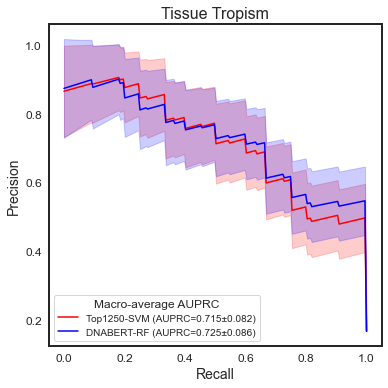

In [20]:
##====== Fig. 3G Tissue Tropism AUPRC

import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import glob


def compute_macro_pr(file, classes, prob_cols, recall_grid):
    df = pd.read_csv(file)

    # one-hot 编码
    y_true = label_binarize(df["true"], classes=classes)
    y_score = df[prob_cols].values

    # 每个类别算 PR
    precisions = []
    aucs = []
    for i in range(len(classes)):
        precision, recall, _ = precision_recall_curve(y_true[:, i], y_score[:, i])
        pr_auc = auc(recall, precision)
        aucs.append(pr_auc)
        # recall 递增，反转后插值
        precision_interp = np.interp(recall_grid, recall[::-1], precision[::-1])
        precisions.append(precision_interp)

    # 取类别平均
    mean_prec = np.mean(precisions, axis=0)
    macro_auc = np.mean(aucs)
    return mean_prec, macro_auc

def compute_group_curves(file_list, classes, prob_cols, recall_grid):
    prec_list, auc_list = [], []
    for file in file_list:
        mean_prec, macro_auc = compute_macro_pr(file, classes, prob_cols, recall_grid)
        prec_list.append(mean_prec)
        auc_list.append(macro_auc)
    # 计算平均和方差
    mean_prec = np.mean(prec_list, axis=0)
    std_prec = np.std(prec_list, axis=0)
    mean_auc = np.mean(auc_list)
    std_auc = np.std(auc_list)
    return mean_prec, std_prec, mean_auc, std_auc

def macro_auprc_tissue_tropism():
    # ========= 参数 =========
    classes = [0,1,2,3,4,5]
    prob_cols = ["prob_gastrointestinal", "prob_neural", "prob_other", 
                 "prob_respiratory", "prob_systemic", "prob_viraemic"]

    recall_grid = np.linspace(0, 1, 200)

    # ========= 文件列表 =========
    exp_files = glob.glob("../data/tissue_tropism/ppibased/top1250_probs_split*.csv")   # 实验组100个文件
    ctrl_files = glob.glob("../data/tissue_tropism/genomebased/probs_split*.csv")     # 对照组100个文件

    # ========= 计算 =========
    exp_mean_prec, exp_std_prec, exp_mean_auc, exp_std_auc = compute_group_curves(exp_files, classes, prob_cols, recall_grid)
    ctrl_mean_prec, ctrl_std_prec, ctrl_mean_auc, ctrl_std_auc = compute_group_curves(ctrl_files, classes, prob_cols, recall_grid)

    # ========= 绘图 =========
    plt.figure(figsize=(5.5,5.5))

    # 实验组
    plt.plot(recall_grid, exp_mean_prec, color="red", 
             label=f"Top1250-SVM (AUPRC={exp_mean_auc:.3f}±{exp_std_auc:.3f})")
    plt.fill_between(recall_grid, exp_mean_prec-exp_std_prec, exp_mean_prec+exp_std_prec, 
                     color="red", alpha=0.2)

    # 对照组
    plt.plot(recall_grid, ctrl_mean_prec, color="blue", 
             label=f"DNABERT-RF (AUPRC={ctrl_mean_auc:.3f}±{ctrl_std_auc:.3f})")
    plt.fill_between(recall_grid, ctrl_mean_prec-ctrl_std_prec, ctrl_mean_prec+ctrl_std_prec, 
                     color="blue", alpha=0.2)

    plt.xlabel("Recall", fontsize=14)
    plt.xticks(fontsize=12)
    plt.ylabel("Precision", fontsize=14)
    plt.yticks(fontsize=12)
    plt.legend(loc="lower left", title="Macro-average AUPRC", fontsize=10, title_fontsize=12)

    plt.title("Tissue Tropism", fontsize=16)

    ax = plt.gca()    
    for spine in ax.spines.values():
        spine.set_linewidth(2)

    plt.tight_layout()

    plt.savefig("../fig_saved/Fig3B_4_tissue_tropism_auprc.pdf",
        format="pdf", 
        dpi=300,  # 高分辨率
        bbox_inches="tight", # 防止内容被裁剪
        pad_inches=0.1)  # 添加少许边距
    
    plt.show()




if __name__ == "__main__":
    macro_auprc_tissue_tropism()


             group  class      mean       std
0  Genome-4mer-KNN      2  0.743437  0.067842
1  Genome-4mer-KNN      3  0.819688  0.049432
2  Genome-4mer-KNN      4  0.853750  0.057379
3       Top200-SVM      2  0.788125  0.058181
4       Top200-SVM      3  0.875313  0.040097
5       Top200-SVM      4  0.880938  0.053613


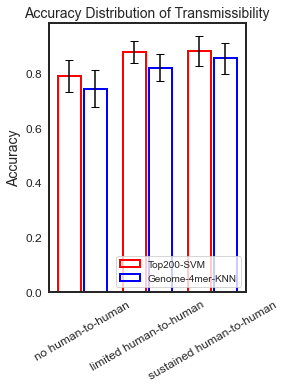

In [21]:
##====== Fig. 3 H-J h-j. Test accuracy of models across different categories within transmissibility (H), transmission route (I), and tissue tropism (J) ======##

#### Fig. 3H Transmissibility Accuracy

import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import glob

# ========= 计算单个文件的 per-class Accuracy =========
def compute_class_accuracy(file, classes):
    df = pd.read_csv(file)
    y_true = df["true"].values
    y_pred = df["pred"].values

    accs = {}
    for cls in classes:
        y_true_bin = (y_true == cls).astype(int)
        y_pred_bin = (y_pred == cls).astype(int)
        if np.sum(y_true_bin) == 0:
            accs[cls] = np.nan
        else:
            accs[cls] = accuracy_score(y_true_bin, y_pred_bin)
    return accs


# ========= 通用计算函数 =========
def compute_group_metric(file_list, group_name, classes, metric_func):
    records = []
    for file in file_list:
        metrics = metric_func(file, classes)
        for cls, val in metrics.items():
            records.append({"group": group_name, "class": cls, "value": val})
    return pd.DataFrame(records)


# ========= 通用绘图函数 =========
def barplot_metric(df_all, classes, ylabel, title, savepath):
    plt.figure(figsize=(4,5.5))
    ax = plt.gca()

    df_stats = df_all.groupby(["group", "class"])["value"].agg(["mean", "std"]).reset_index()
    print(df_stats)

    groups = df_all["group"].unique()
    bar_width = 0.35
    gap = 0.05
    x = np.arange(len(classes))
    colors = {"Top200-SVM":"red", "Genome-4mer-KNN":"blue"}  # Nature风格配色

    for i, group in enumerate(groups):
        stats_group = df_stats[df_stats["group"] == group]
        means = stats_group["mean"].values
        stds = stats_group["std"].values
        offset = (i - 0.5) * (bar_width + gap)
        ax.bar(
            x + offset, means, yerr=stds,
            width=bar_width, facecolor="none",
            edgecolor=colors[group],
            capsize=4, linewidth=2
        )

    # 图例
    handles = [plt.Rectangle((0,0),1,1, facecolor="none", edgecolor=colors[g], linewidth=2) for g in groups]
    plt.legend(handles, groups, fontsize=10, loc="lower right")

    x_labels = ["no human-to-human","limited human-to-human","sustained human-to-human"]
    plt.xticks(ticks=range(len(x_labels)), labels=x_labels, fontsize=12, rotation=30)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(title, fontsize=14)
    plt.yticks(fontsize=12)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)  
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    plt.tight_layout()

    plt.savefig(savepath, format="pdf", dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()


# ========= Accuracy 图 =========
def barplot_accuracy_transmissibility():
    classes = [2, 3, 4]
    exp_files = glob.glob("../data/transmissibility/ppibased/top200_probs_split*.csv")
    ctrl_files = glob.glob("../data/transmissibility/genomebased/probs_split*.csv")

    df_exp = compute_group_metric(exp_files, "Top200-SVM", classes, compute_class_accuracy)
    df_ctrl = compute_group_metric(ctrl_files, "Genome-4mer-KNN", classes, compute_class_accuracy)
    df_all = pd.concat([df_exp, df_ctrl], ignore_index=True)

    barplot_metric(df_all, classes, "Accuracy", "Accuracy Distribution of Transmissibility",
                   "../fig_saved/Fig3B_barplot_transmissibility_Accuracy.pdf")




if __name__ == "__main__":
    barplot_accuracy_transmissibility()


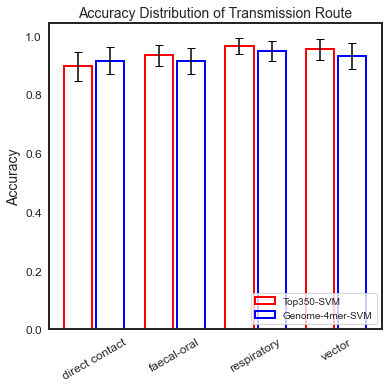

In [22]:
##====== Fig. 3I Transmission Route Accuracy

import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import glob


# ========= 计算单个文件的 per-class Accuracy =========
def compute_class_accuracy(file, classes):
    df = pd.read_csv(file)
    y_true = df["true"].values
    y_pred = df["pred"].values

    accs = {}
    for cls in classes:
        y_true_bin = (y_true == cls).astype(int)
        y_pred_bin = (y_pred == cls).astype(int)
        if np.sum(y_true_bin) == 0:
            accs[cls] = np.nan
        else:
            accs[cls] = accuracy_score(y_true_bin, y_pred_bin)
    return accs


# ========= 通用计算函数 =========
def compute_group_metric(file_list, group_name, classes, metric_func):
    records = []
    for file in file_list:
        metrics = metric_func(file, classes)
        for cls, val in metrics.items():
            records.append({"group": group_name, "class": cls, "value": val})
    return pd.DataFrame(records)


# ========= 通用绘图函数 =========
def barplot_metric(df_all, classes, ylabel, title, savepath):
    plt.figure(figsize=(5.5, 5.5))
    ax = plt.gca()

    df_stats = df_all.groupby(["group", "class"])["value"].agg(["mean", "std"]).reset_index()

    groups = df_all["group"].unique()
    bar_width = 0.35
    gap = 0.05
    x = np.arange(len(classes))
    colors = {"Top350-SVM": "red", "Genome-4mer-SVM": "blue"}  # Nature风格配色

    for i, group in enumerate(groups):
        stats_group = df_stats[df_stats["group"] == group]
        means = stats_group["mean"].values
        stds = stats_group["std"].values
        offset = (i - 0.5) * (bar_width + gap)
        ax.bar(
            x + offset,
            means,
            yerr=stds,
            width=bar_width,
            facecolor="none",
            edgecolor=colors[group],
            capsize=4,
            linewidth=2,
        )

    # 图例
    handles = [plt.Rectangle((0, 0), 1, 1, facecolor="none", edgecolor=colors[g], linewidth=2) for g in groups]
    plt.legend(handles, groups, fontsize=10, loc="lower right")

    x_labels = ["direct contact", "faecal-oral", "respiratory", "vector"]
    plt.xticks(ticks=range(len(x_labels)), labels=x_labels, fontsize=12, rotation=30)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(title, fontsize=14)
    plt.yticks(fontsize=12)
    ax.spines["bottom"].set_linewidth(2)
    ax.spines["left"].set_linewidth(2)
    ax.spines["top"].set_linewidth(2)
    ax.spines["right"].set_linewidth(2)
    plt.tight_layout()

    plt.savefig(savepath, format="pdf", dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()


# ========= Accuracy 图 =========
def barplot_accuracy_transmission_route():
    #### 传播方式
    classes = ["direct contact", "faecal-oral", "respiratory", "vector"]
    exp_files = glob.glob("../data/transmission_route/ppibased/top350_probs_split*.csv")   # 实验组100个文件
    ctrl_files = glob.glob("../data/transmission_route/genomebased/probs_split*.csv") # 对照组100个文件

    df_exp = compute_group_metric(exp_files, "Top350-SVM", classes, compute_class_accuracy)
    df_ctrl = compute_group_metric(ctrl_files, "Genome-4mer-SVM", classes, compute_class_accuracy)
    df_all = pd.concat([df_exp, df_ctrl], ignore_index=True)

    barplot_metric(
        df_all,
        classes,
        "Accuracy",
        "Accuracy Distribution of Transmission Route",
        "../fig_saved/Fig3B_barplot_transmission_route_Accuracy.pdf",
    )



if __name__ == "__main__":
    barplot_accuracy_transmission_route()


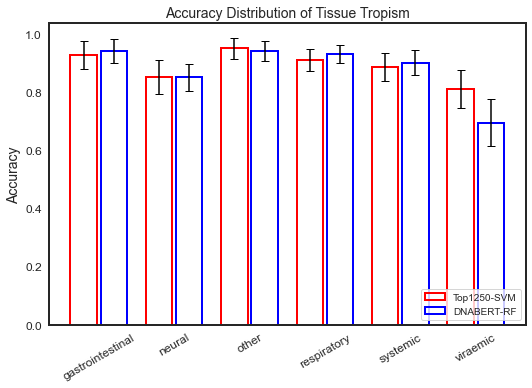

In [23]:
##====== Fig. 3J Tissue Tropism Accuracy


import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import glob


# ========= 计算单个文件的 per-class Accuracy =========
def compute_class_accuracy(file, classes):
    df = pd.read_csv(file)
    y_true = df["true"].values
    y_pred = df["pred"].values

    accs = {}
    for cls in classes:
        y_true_bin = (y_true == cls).astype(int)
        y_pred_bin = (y_pred == cls).astype(int)
        if np.sum(y_true_bin) == 0:
            accs[cls] = np.nan
        else:
            accs[cls] = accuracy_score(y_true_bin, y_pred_bin)
    return accs


# ========= 通用计算函数 =========
def compute_group_metric(file_list, group_name, classes, metric_func):
    records = []
    for file in file_list:
        metrics = metric_func(file, classes)
        for cls, val in metrics.items():
            records.append({"group": group_name, "class": cls, "value": val})
    return pd.DataFrame(records)


# ========= 通用绘图函数 =========
def barplot_metric(df_all, classes, ylabel, title, savepath):
    plt.figure(figsize=(7.5, 5.5))
    ax = plt.gca()

    df_stats = df_all.groupby(["group", "class"])["value"].agg(["mean", "std"]).reset_index()

    groups = df_all["group"].unique()
    bar_width = 0.35
    gap = 0.05
    x = np.arange(len(classes))
    colors = {"Top1250-SVM": "red", "DNABERT-RF": "blue"}  # Nature风格配色

    for i, group in enumerate(groups):
        stats_group = df_stats[df_stats["group"] == group]
        means = stats_group["mean"].values
        stds = stats_group["std"].values
        offset = (i - 0.5) * (bar_width + gap)
        ax.bar(
            x + offset,
            means,
            yerr=stds,
            width=bar_width,
            facecolor="none",
            edgecolor=colors[group],
            capsize=4,
            linewidth=2,
        )

    # 图例
    handles = [plt.Rectangle((0, 0), 1, 1, facecolor="none", edgecolor=colors[g], linewidth=2) for g in groups]
    plt.legend(handles, groups, fontsize=10, loc="lower right")

    x_labels = ["gastrointestinal", "neural", "other", "respiratory", "systemic", "viraemic"]
    plt.xticks(ticks=range(len(x_labels)), labels=x_labels, fontsize=12, rotation=30)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(title, fontsize=14)
    plt.yticks(fontsize=12)
    ax.spines["bottom"].set_linewidth(2)
    ax.spines["left"].set_linewidth(2)
    ax.spines["top"].set_linewidth(2)
    ax.spines["right"].set_linewidth(2)
    plt.tight_layout()

    plt.savefig(savepath, format="pdf", dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()


# ========= Accuracy 图 =========
def barplot_accuracy_tissue_tropism():
    #### 组织嗜性
    classes = [0, 1, 2, 3, 4, 5]
    exp_files = glob.glob("../data/tissue_tropism/ppibased/top1250_probs_split*.csv")
    ctrl_files = glob.glob("../data/tissue_tropism/genomebased/probs_split*.csv")

    df_exp = compute_group_metric(exp_files, "Top1250-SVM", classes, compute_class_accuracy)
    df_ctrl = compute_group_metric(ctrl_files, "DNABERT-RF", classes, compute_class_accuracy)
    df_all = pd.concat([df_exp, df_ctrl], ignore_index=True)

    barplot_metric(
        df_all,
        classes,
        "Accuracy",
        "Accuracy Distribution of Tissue Tropism",
        "../fig_saved/Fig3B_barplot_tissue_tropism_Accuracy.pdf",
    )



if __name__ == "__main__":
    barplot_accuracy_tissue_tropism()


## Fig. 4 Phenotype predictions of potentially human-infecting viruses using PPI-based models.

(46, 4)
(46, 4)
29


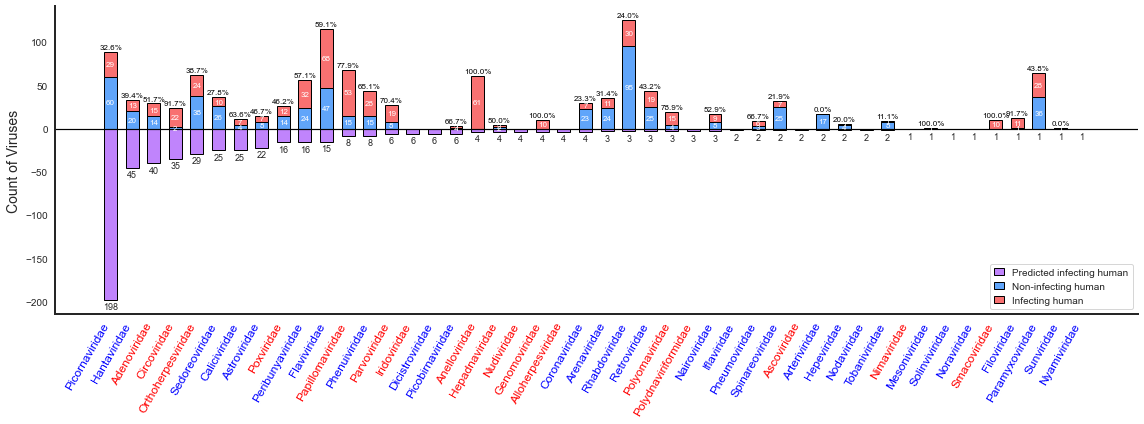

In [25]:
##====== Fig. 4A Distribution of potentially human-infecting, known human-infecting and non-human-infecting viruses at the family level

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def virus_taxonomy_distribution():
    # 1. 读取数据
    dt_target_vtaxid = pd.read_excel(
        "../data/low_evidence_virus/all_known_infecting_human_virus_from_fengyang_with_non_mammalian_and_reversed.xlsx", 
        sheet_name="Sheet1", header=0
    )

    # 构建 genome_type_brief
    genome_type_brief = []
    for i in range(dt_target_vtaxid.shape[0]):
        genome_type_str = dt_target_vtaxid["Genome type"][i]
        if "DNA" in genome_type_str:
            genome_type_brief.append("DNA virus")
        elif "RNA" in genome_type_str:
            genome_type_brief.append("RNA virus")
        else:
            genome_type_brief.append("Unclassified virus")
    dt_target_vtaxid["genome_type_brief"] = genome_type_brief

    # 过滤掉非哺乳动物和内源性逆转录病毒
    dt_target_vtaxid = dt_target_vtaxid[
        (dt_target_vtaxid["non_mammalian"] == 0) & 
        (dt_target_vtaxid["Endogenous retrovirus"] == 0)
    ].reset_index(drop=True)

    list_target_vtaxid = dt_target_vtaxid["Taxid"].tolist()
    
    # 读取已知标签和预测结果
    dt_known = pd.read_csv("../data/low_evidence_virus/dt_num_high_middle_pos_neg.csv", sep="\t", header=0)
    df_low = pd.read_csv("../data/low_evidence_virus/pred_result_low_evidence_fam_new.csv")
    df_low = df_low[df_low["pred_score"] > 0.51].reset_index(drop=True)
    df_low = df_low[df_low["taxid"].isin(list_target_vtaxid)].reset_index(drop=True)

    # 2. 统计科水平分布
    family_counts = df_low["Family"].value_counts().sort_values(ascending=False)
    family_counts = pd.DataFrame(family_counts)
    family_counts["vfam"] = family_counts.index
    family_counts.reset_index(drop=True, inplace=True) 
    """
    family_counts_merge = pd.merge(
        left=family_counts, right=dt_known, on="vfam", how="left"
    )
    family_counts_merge["num_pos"].fillna("NoNum", inplace=True)
    print(family_counts_merge.shape)
    family_counts_merge = family_counts_merge[family_counts_merge["num_pos"]!="NoNum"].reset_index(drop=True)
    print(family_counts_merge.shape)
    """

    family_counts_merge = pd.merge(
        left=family_counts, right=dt_known, on="vfam", how="left"
    )
    print(family_counts_merge.shape)
    # 将缺失值填充为0
    family_counts_merge["num_pos"] = family_counts_merge["num_pos"].fillna(0).astype(int)
    family_counts_merge["num_neg"] = family_counts_merge["num_neg"].fillna(0).astype(int)
    print(family_counts_merge.shape)


    # 3. 关联 genome_type_brief (注意列名是 Virus family)
    fam_to_type = dt_target_vtaxid.drop_duplicates("Virus family")[["Virus family", "genome_type_brief"]]
    family_counts_merge = pd.merge(
        family_counts_merge, fam_to_type, left_on="vfam", right_on="Virus family", how="left"
    )

    # 4. 绘图（镜像分布）
    fig, ax = plt.subplots(figsize=(16, 6))
    x = np.arange(len(family_counts_merge))

    # 左侧：Predicted infecting human（紫色，负方向）
    ax.bar(x, -family_counts_merge["count"], width=0.6,
           color="#c084fc", edgecolor="black", label="Predicted infecting human")

    # 右侧：Non-infecting + Infecting human（堆积）
    pos_vals = family_counts_merge["num_pos"].astype(int)
    neg_vals = family_counts_merge["num_neg"].astype(int)

    ax.bar(x, neg_vals, width=0.6, color="#60a5fa", edgecolor="black", label="Non-infecting human")
    ax.bar(x, pos_vals, width=0.6, bottom=neg_vals,
           color="#f87171", edgecolor="black", label="Infecting human")

    # 添加数值标签
    for i, (cnt, neg, pos) in enumerate(zip(family_counts_merge["count"], neg_vals, pos_vals)):
        if cnt > 0:
            ax.text(i, -cnt - 3, str(int(cnt)), ha="center", va="top", fontsize=9)
        if neg > 0:
            ax.text(i, neg/2, str(neg), color="white", ha="center", va="center", fontsize=8)
        if pos > 0:
            ax.text(i, neg + pos/2, str(pos), color="white", ha="center", va="center", fontsize=8)
        total = neg + pos
        if total > 0:
            perc = f"{pos/total*100:.1f}%"
            ax.text(i, total + 2, perc, ha="center", va="bottom", fontsize=8, color="black")

    # x轴标签颜色（根据基因组类型）
    xticklabels, xxx = [], 0
    for fam, gtype in zip(family_counts_merge["vfam"], family_counts_merge["genome_type_brief"]):
        if gtype == "DNA virus":
            xticklabels.append((fam, "red"))
        elif gtype == "RNA virus":
            xticklabels.append((fam, "blue"))
            xxx += 1
        else:
            xticklabels.append((fam, "gray"))
    print(xxx)
    ax.set_xticks(x)
    ax.set_xticklabels([fam for fam, _ in xticklabels], rotation=60, ha="right", fontsize=12)
    for ticklabel, (_, color) in zip(ax.get_xticklabels(), xticklabels):
        ticklabel.set_color(color)

    # y轴
    ax.set_ylabel("Count of Viruses", fontsize=14)

    # 在 y=0 画中线
    ax.axhline(0, color="black", linewidth=1.2)

    # 坐标轴样式
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_linewidth(2)
    ax.spines["bottom"].set_linewidth(2)

    ax.legend(loc="lower right", fontsize=10, handlelength=1)

    plt.tight_layout()
    
    plt.savefig("../fig_saved/Fig4A_bar_fam_ratio.pdf",
        format="pdf", 
        dpi=300,  # 高分辨率
        bbox_inches="tight", # 防止内容被裁剪
        pad_inches=0.1)  # 添加少许边距
    
    plt.show()


if __name__ == "__main__":
    virus_taxonomy_distribution()


In [ ]:
##====== Fig. 4B Predicted transmission route, tissue tropism, virulence, and transmissibility of potentially human-infecting RNA viruses ======##

## see ./codeForFig4B.R

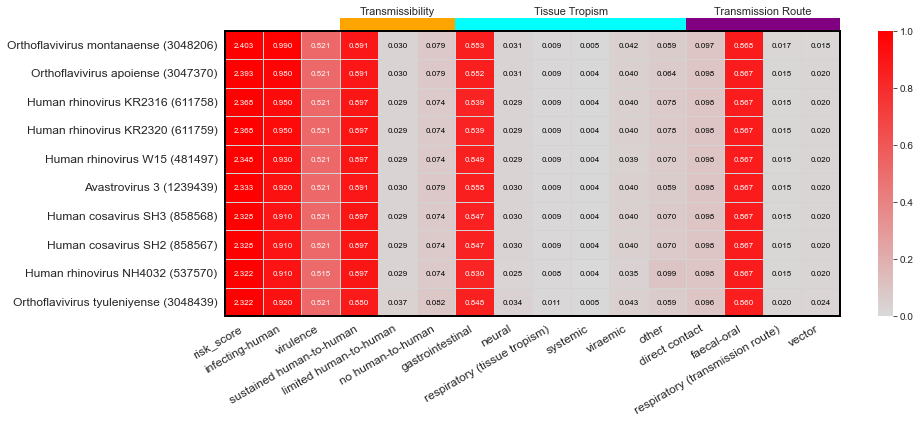

In [ ]:
##====== Fig. 4C Top10 viruses of concern ranked by risk scores ======##

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches

def heatmap_phenotypes_binary():
    # ========= 1. 读入数据（示例，保持你的路径逻辑不变） =========
    dt_value = pd.read_csv("../data/low_evidence_virus/403_rna_phenotype_value.csv", sep="\t", header=0)
    colnames_list = dt_value.columns.tolist()
    dt_value = dt_value.loc[:,colnames_list]
    dt_value["risk_score"] = (dt_value["virulence"] + dt_value["infecting-human"] + dt_value["sustained human-to-human"])
    
    # 按 Combined score 排序
    dt_sorted = dt_value.sort_values(by="risk_score", ascending=False).reset_index(drop=True)
    top10 = dt_sorted.head(10)["virus name"].tolist()

    # 只保留前 10 行和所需列
    heatmap_df = dt_sorted.set_index("virus name").loc[top10, [
        "risk_score","infecting-human","virulence",
        "sustained human-to-human","limited human-to-human","no human-to-human",
        "gastrointestinal","neural","respiratory (tissue tropism)","systemic","viraemic","other",
        "direct contact","faecal-oral","respiratory (transmission route)","vector"
    ]]

    # ========= 2. 处理数据 =========
    # 保存 Combined score，热图填充时置 0
    scores = heatmap_df["risk_score"].copy()
    plot_df = heatmap_df.copy()
    #plot_df["Combined score"] = 0

    # ========= 3. 绘制热图 =========
    plt.figure(figsize=(14, 6))
    cmap = LinearSegmentedColormap.from_list("gray_red", ["#d9d9d9", "#ff0000"])

    ax = sns.heatmap(
        plot_df,
        cmap=cmap,
        cbar=True,
        vmin=0, vmax=1,   # 其他 15 列是概率值 0–1
        linewidths=0.5, linecolor="lightgrey"
    )

    # 添加黑色边框
    ax.add_patch(patches.Rectangle(
        (0, 0),
        heatmap_df.shape[1],
        heatmap_df.shape[0],
        fill=False, edgecolor="black", lw=2, clip_on=False
    ))

    # 坐标轴样式
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, fontsize=12, ha="right")
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title("")
    """
    # ========= 在 Combined score 那一列写数值 =========
    for i, score in enumerate(scores):
        ax.text(0.5, i + 0.5, f"{score:.3f}",
                ha="center", va="center", fontsize=10, color="black")
    """
        # ========= 在所有方块写数值 =========
    for i in range(plot_df.shape[0]):      # 行
        for j in range(plot_df.shape[1]):  # 列
            if j == 0:  # Combined score 列
                text_val = f"{scores.iloc[i]:.3f}"
                #text_color = "black"
                text_color = "white"
            else:
                text_val = f"{heatmap_df.iloc[i, j]:.3f}"
                text_color = "black" if plot_df.iloc[i, j] < 0.5 else "white"
            
            ax.text(j + 0.5, i + 0.5, text_val,
                    ha="center", va="center", fontsize=8, color=text_color)


    # ========= 添加顶部分组标签 =========
    group_bounds = {
        "Transmissibility": (3, 6),       # 3 列
        "Tissue Tropism": (6, 12),        # 6 列
        "Transmission Route": (12, 16)    # 4 列
    }
    group_colors = {
        "Transmissibility": "orange",
        "Tissue Tropism": "cyan",
        "Transmission Route": "purple"
    }

    for label, (start, end) in group_bounds.items():
        x = (start + end) / 2
        y = -1.2
        ax.text(x, y+0.7, label, ha="center", va="bottom", fontsize=11)
        ax.hlines(
            y=-0.25, xmin=start, xmax=end, 
            color=group_colors[label], linewidth=12, clip_on=False
        )

    plt.tight_layout()
    
    plt.savefig("../fig_saved/Fig4c_heatmap_top10_virus.v2.pdf",
        format="pdf", 
        dpi=300,  # 高分辨率
        bbox_inches="tight", # 防止内容被裁剪
        pad_inches=0.1)  # 添加少许边距
    
    plt.show()


if __name__ == "__main__":
    heatmap_phenotypes_binary()


**⚠️ Codes for predicting virulence of low evidence viruses were applicable at `./predict_virulence_via_vhPPIpredAndGNN/`**

## Fig. 5 Classification of HPV based on virus-human PPIs

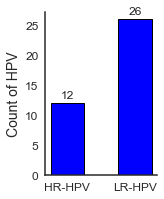

In [ ]:
##====== Fig. 5A Number of high-risk (HR) and low-risk (LR) HPVs used for classification ======##

import matplotlib.pyplot as plt
import numpy as np

def data_components():
    # 数据
    sources = ["HR-HPV", "LR-HPV"]
    counts = [12, 26]

    plt.figure(figsize=(2,3))
    x = np.arange(len(sources))
    # 柱子设置窄一些（width=0.4）
    bars = plt.bar(x, counts, color="blue", edgecolor="black", width=0.5)

    # 设置x轴刻度
    plt.xticks(x, sources, size=12)
    plt.ylabel("Count of HPV", size=14)
    plt.yticks(size=12)
    #plt.title("Data Sources", size=16)

    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["bottom"].set_linewidth(1.5)

    # 在柱子顶部加上数值
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2,
                 count + 0.5,
                 str(count),
                 ha='center', va='bottom', fontsize=12)

    # 调整 x 轴范围，让柱子之间紧凑
    #plt.xlim(-0.2, len(sources)-0.8)

    plt.savefig("../fig_saved/Fig5A.pdf",
            format="pdf", 
            dpi=300,  # 高分辨率
            bbox_inches="tight", # 防止内容被裁剪
            pad_inches=0.1)  # 添加少许边距

    # 显示图形
    plt.show()


if __name__ == "__main__":
    data_components()


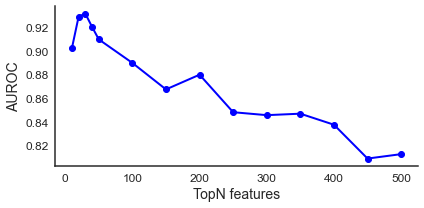

In [29]:
##====== Fig. 5B Validation AUROC across top N important features during feature selection ======##
import os
import matplotlib.pyplot as plt


def fig_feature_importance_auroc():
    fList = ["../data/hpv_classification/feature_importance/"+f for f in os.listdir("../data/hpv_classification/feature_importance/") if f.endswith("summary_val.csv")]
    dt_fig = []
    for f in fList:
        dt_tmp = pd.read_csv(f)
        auc = list(dt_tmp["auc"])[0]
        topN = int(f.split("/")[-1].split("_")[2][3:])
        dt_fig.append([topN, auc])
    dt_fig = pd.DataFrame(dt_fig, columns=["TopN","AUROC"])

    # ========= 2. 按 TopN 排序 =========
    dt_fig.sort_values(by="TopN", inplace=True)
    dt_fig = dt_fig[dt_fig["TopN"]<=500].reset_index(drop=True)

    # ========= 3. 绘制折线图 =========
    plt.figure(figsize=(6,3))
    plt.plot(
        dt_fig["TopN"], dt_fig["AUROC"], 
        marker="o", linestyle="-", linewidth=2, markersize=6, color="blue"
    )
    
    # 设置坐标轴标签和标题，字体调大
    plt.xlabel('TopN features', fontsize=14)
    plt.ylabel('AUROC', fontsize=14)
    
    # 调大刻度字体
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # 去掉上方和右侧的框线，加粗左侧和下方
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    plt.tight_layout()

    plt.savefig("../fig_saved/Fig5B.pdf",
            format="pdf", 
            dpi=300,  # 高分辨率
            bbox_inches="tight", # 防止内容被裁剪
            pad_inches=0.1)  # 添加少许边距
    
    plt.show()



if __name__ == "__main__":
    fig_feature_importance_auroc()

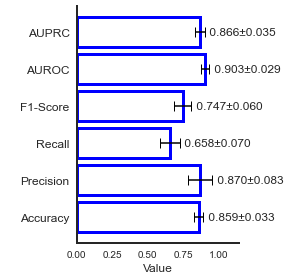

In [30]:
##====== Fig. 5C Performance metrics (accuracy, precision, recall, F1-Score, AUROC, and AUPRC) of combining the top 30 features with Random Forest classifier on test set

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def metric_barplot():
    # 读取数据
    dt = pd.read_csv("../data/hpv_classification/result_ppibased/rf_top30_summary_val.csv", sep=",", index_col=0)
    
    # 提取均值和标准差
    mean_vals = dt.loc["mean"]
    std_vals = dt.loc["std"]
    
    # y轴标签（指标名称）
    metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "AUROC", "AUPRC"]
    
    # 确保数据长度与指标数量匹配
    if len(mean_vals) != len(metrics):
        print(f"警告: 数据有 {len(mean_vals)} 个值，但提供了 {len(metrics)} 个指标名称")
        # 如果数据长度不匹配，只使用前n个指标
        metrics = metrics[:len(mean_vals)]
    
    y = np.arange(len(metrics))
    
    # 绘制横向柱状图（带误差棒）
    fig, ax = plt.subplots(figsize=(4, 4))
    bars = ax.barh(y, mean_vals, xerr=std_vals, capsize=5, color="none", edgecolor="blue", linewidth=3)
    
    # 在柱状图右侧加上均值 ± 标准差
    for i, (mean, std) in enumerate(zip(mean_vals, std_vals)):
        ax.text(mean + std + 0.01, i, f"{mean: .3f}±{std:.3f}", 
                ha="left", va="center", fontsize=12)
    
    # 设置坐标轴标签
    ax.set_xlabel("Value", fontsize=12)
    ax.set_ylabel(" ")
    
    # 设置y轴刻度标签
    ax.set_yticks(y)
    ax.set_yticklabels(metrics, fontsize=12)
    
    
    # 设置x轴范围，确保文本显示完整
    ax.set_xlim(0, max(mean_vals + std_vals) * 1.2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    
    
    # 调整布局
    plt.tight_layout()

    plt.savefig("../fig_saved/Fig5C.pdf",
            format="pdf", 
            dpi=300,  # 高分辨率
            bbox_inches="tight", # 防止内容被裁剪
            pad_inches=0.1)  # 添加少许边距
    
    plt.show()


if __name__ == "__main__":
    metric_barplot()

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


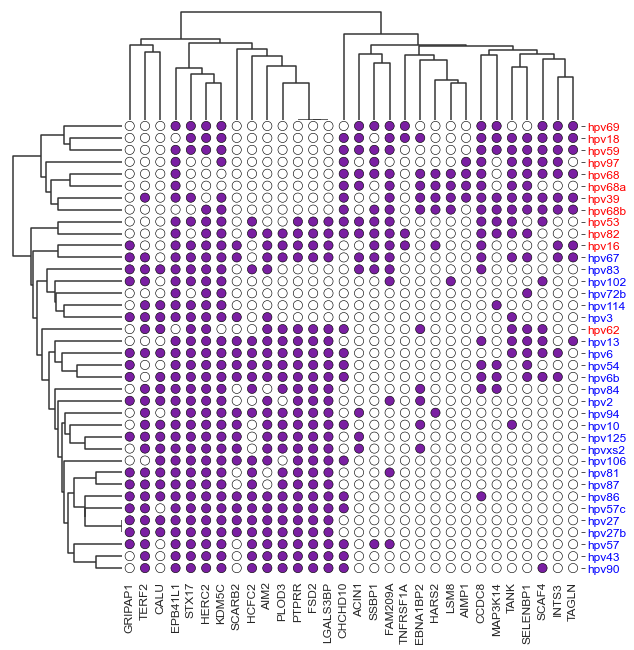

In [31]:
##====== Fig. 5D Visualization of interactions between HPVs and the top30 human genes ======##

def figshow_difference_human_gene_bubble():
    import pandas as pd
    import numpy as np
    import mygene
    import seaborn as sns
    import matplotlib.pyplot as plt

    known_gene_of_hpv_infection = [
        "CCNB1","SMAD3","PCNA","HNRNPDL","TP53","RB1","RBL1","RBL2",
        "NCL","U2AF2","PABPC1","HNRNPA2B1","SRSF5","PCBP2"
    ]  # 已知与HPV相关基因
    
    # ========= 1. 读取数据 =========
    df = pd.read_csv('../data/hpv_classification/ppi_binary_matrix.csv').rename(
        columns={'Unnamed: 0': 'Taxid', 'risk_label': 'Label'}
    )

    # 读取100次划分下的特征重要性，选Top30基因
    feature_importances_df = pd.read_csv("../data/hpv_classification/feature_importance/rf_feature_importances_ppibinary.csv")
    mean_importance = feature_importances_df.mean()
    top_n_features = mean_importance.sort_values(ascending=False).head(30).index.tolist()
    dt_ppi_binary = df.loc[:, top_n_features + ["Taxid", "Label"]]
    humanprotein_list = dt_ppi_binary.columns.tolist()[0:-2]

    # ========= 2. UniProt → Gene Symbol =========
    mg = mygene.MyGeneInfo()
    out = mg.querymany(humanprotein_list, scopes="uniprot", fields="symbol", species="human")
    df_map = pd.DataFrame(out)
    df_map["symbol"].fillna("NoGene", inplace=True)
    dict_unid2gene = {df_map["query"][i]: df_map["symbol"][i] for i in range(df_map.shape[0])}

    colnames_gene = []
    for p in dt_ppi_binary.columns.tolist():
        try:
            genename = dict_unid2gene[p]
            colnames_gene.append(genename if genename != "NoGene" else p)
        except Exception:
            colnames_gene.append(p)
    dt_ppi_binary.columns = colnames_gene

    # ========= 3. 设置 Taxid 为行索引 =========
    mat = dt_ppi_binary.set_index("Taxid")
    taxid_labels = mat["Label"]
    mat = mat.drop(columns=["Label"])  # 仅保留0/1矩阵（行=Taxid，列=基因）

    # ========= 4. 聚类，但把底图格子全部遮掉 =========
    g = sns.clustermap(
        mat,
        method="average",
        metric="euclidean",
        figsize=(9, 9),
        tree_kws={"linewidths": 1.5},   # 树状图线条加粗
        cbar_pos=None,
        mask=np.ones_like(mat, dtype=bool),  # 关键：遮掉所有方格
        linewidths=0
    )
    ax = g.ax_heatmap
    ax.set_facecolor("white")  # 背景纯白

    # ========= 5. 按聚类后的顺序叠加圆圈（颜色代表0/1，大小一致） =========
    row_idx = g.dendrogram_row.reordered_ind
    col_idx = g.dendrogram_col.reordered_ind
    mat_re = mat.iloc[row_idx, col_idx]           # 重新排序后的矩阵
    vals = mat_re.values

    # 坐标（注意clustermap的像素格中心在+0.5处）
    y_pos = np.arange(vals.shape[0]) + 0.5
    x_pos = np.arange(vals.shape[1]) + 0.5
    X, Y = np.meshgrid(x_pos, y_pos)

    colors = np.where(vals.ravel() == 1, "#7A1FA2", "white")  # 1=紫色, 0=白色
    ax.scatter(
        X.ravel(), Y.ravel(),
        s=85, c=colors, edgecolors="black", linewidths=0.6
    )

    # ========= 6. 坐标轴标签 =========
    # x轴：基因名（已排序）
    ax.set_xticks(x_pos)
    ax.set_xticklabels(mat_re.columns, rotation=90, fontsize=12)

    # y轴：Taxid 并按 Label 上色
    ax.set_yticks(y_pos)
    ax.set_yticklabels(mat_re.index, rotation=0, fontsize=12)
    for tick, taxid in zip(ax.get_yticklabels(), mat_re.index):
        tick.set_color("blue" if taxid_labels.loc[taxid] == 0 else "red")

    # ========= 7. x轴基因染色：已知与HPV相关的标红 =========
    for tick, gene in zip(ax.get_xticklabels(), mat_re.columns):
        if gene in known_gene_of_hpv_infection:
            tick.set_color("red")
            tick.set_fontweight("bold")

    # 去掉轴标题
    ax.set_xlabel("")
    ax.set_ylabel("")

    plt.savefig("../fig_saved/Fig5D.pdf",
            format="pdf", 
            dpi=300,  # 高分辨率
            bbox_inches="tight", # 防止内容被裁剪
            pad_inches=0.1)  # 添加少许边距

    plt.show()


if __name__ == "__main__":
    figshow_difference_human_gene_bubble()


Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


High cluster genes: ['TANK', 'CCDC8', 'INTS3', 'SSBP1', 'FAM209A', 'SCAF4', 'TAGLN', 'SELENBP1', 'HARS2', 'CHCHD10', 'ACIN1', 'MAP3K14', 'TNFRSF1A', 'LSM8', 'EBNA1BP2', 'AIMP1']
Low cluster genes: ['TERF2', 'STX17', 'AIM2', 'GRIPAP1', 'HERC2', 'HCFC2', 'KDM5C', 'FSD2', 'CALU', 'PLOD3', 'LGALS3BP', 'PTPRR', 'EPB41L1', 'SCARB2']


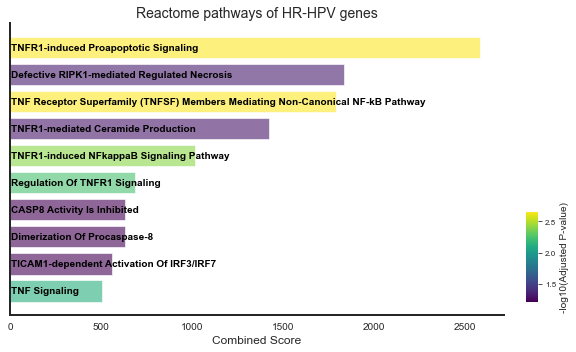

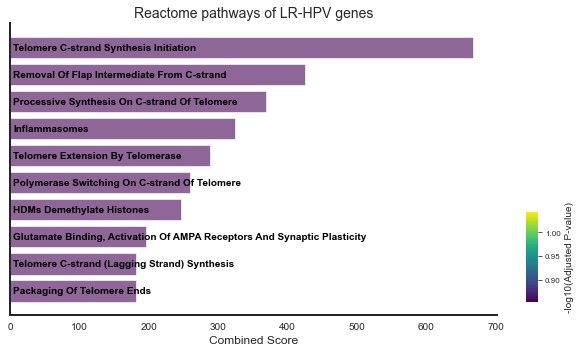

In [34]:
##====== Fig. 5E,F Reactome enrichment analysis of human genes for HR-HPVs (E) and LR-HPVs (F) ======##

def figshow_human_gene_cluster_barplot():
    import pandas as pd
    import mygene
    import matplotlib.pyplot as plt
    import seaborn as sns
    import gseapy as gp
    from scipy.cluster.hierarchy import linkage, fcluster
    import numpy as np
    import re

    # ========= 1. 读取数据 =========
    df = pd.read_csv('../data/hpv_classification/ppi_binary_matrix.csv').rename(
        columns={'Unnamed: 0': 'Taxid', 'risk_label': 'Label'}
    )

    # 读取特征重要性，选Top30基因
    feature_importances_df = pd.read_csv("../data/hpv_classification/feature_importance/rf_feature_importances_ppibinary.csv")
    mean_importance = feature_importances_df.mean()
    top_n_features = mean_importance.sort_values(ascending=False).head(30).index.tolist()

    # 保留这 30 个蛋白 + 标签
    dt_ppi_binary = df.loc[:, top_n_features + ["Taxid", "Label"]]

    # 蛋白列表
    humanprotein_list = dt_ppi_binary.columns.tolist()[0:-2]

    # UniProt → Gene Symbol
    mg = mygene.MyGeneInfo()
    out = mg.querymany(humanprotein_list, scopes="uniprot", fields="symbol", species="human")
    df_map = pd.DataFrame(out)
    id2symbol = df_map.set_index("query")["symbol"].dropna().to_dict()

    # 把 PPI 矩阵转为 Symbol
    dt_ppi_binary = dt_ppi_binary.rename(columns=id2symbol)

    # ========= 2. 对基因做层次聚类，分成两大类 =========
    X = dt_ppi_binary.drop(columns=["Taxid","Label"]).T
    Z = linkage(X, method="ward")
    cluster_labels = fcluster(Z, t=2, criterion='maxclust')

    gene_cluster = pd.DataFrame({"Gene": X.index, "Cluster": cluster_labels})
    high_gene_list = gene_cluster[gene_cluster["Cluster"] == 1]["Gene"].tolist()
    low_gene_list  = gene_cluster[gene_cluster["Cluster"] == 2]["Gene"].tolist()

    print("High cluster genes:", high_gene_list)
    print("Low cluster genes:", low_gene_list)

    # ========= 3. 富集 + 绘图函数 =========
    def run_enrich_and_barplot(gene_list, title, outfile):
        if len(gene_list) < 3:
            print(f"{title}: 基因数太少，跳过")
            return
    
        enr = gp.enrichr(
            gene_list=gene_list,
            gene_sets=["Reactome_2022"],
            organism="Human",
            outdir=None,
            cutoff=1
        )
        
        df_res = enr.res2d.copy()
        if df_res.empty:
            print(f"{title}: 无富集结果")
            return
    
        # 去掉 R-HSA 编号
        df_res["Term"] = df_res["Term"].apply(lambda x: re.sub(r"R-HSA-\d+", "", x).strip())
    
        # 显著性
        df_res["log10FDR"] = -np.log10(df_res["Adjusted P-value"])
        #df_res.to_csv("./linshi.csv")
        # 取前10个term，按 Combined Score 排序
        df_plot = df_res.nlargest(10, "Combined Score").sort_values("Combined Score", ascending=True)
    
        # 绘制条形图
        fig, ax = plt.subplots(figsize=(8, 5))
        bars = ax.barh(
            y=range(len(df_plot)),
            width=df_plot["Combined Score"],
            color=sns.color_palette("viridis", as_cmap=True)(
                (df_plot["log10FDR"] - df_plot["log10FDR"].min()) /
                (df_plot["log10FDR"].max() - df_plot["log10FDR"].min() + 1e-9)
            ),
            alpha=0.6
        )
    
        # 在条形上加 pathway 标签（左对齐，不换行）
        for i, (bar, term) in enumerate(zip(bars, df_plot["Term"])):
            ax.text(
                x=5,   # 稍微留点空白
                y=bar.get_y() + bar.get_height()/2,
                s=term,
                ha="left", va="center",
                fontsize=10, color="black", fontweight="bold"
            )
    
        ax.set_xlabel("Combined Score", fontsize=12)
        ax.set_ylabel("")
        ax.set_title(title, fontsize=14)
        ax.set_yticks([])   # 去掉 y 轴刻度
    
        # 调整主图边框
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(2)
        ax.spines['bottom'].set_linewidth(2)

        plt.tight_layout(rect=[0,0,0.9,1])  # 给右侧留空间放颜色条
    
        # 显著性颜色条 → 缩小宽度 & 高度，放右下角
        sm = plt.cm.ScalarMappable(
            cmap="viridis",
            norm=plt.Normalize(vmin=df_plot["log10FDR"].min(), vmax=df_plot["log10FDR"].max())
        )
        sm.set_array([])
    
        # [left, bottom, width, height]，相对 figure 大小
        cax = fig.add_axes([0.92, 0.15, 0.02, 0.25])
        cbar = plt.colorbar(sm, cax=cax)
        cbar.set_label("-log10(Adjusted P-value)", fontsize=10)
        cbar.ax.tick_params(labelsize=8)
        cbar.outline.set_visible(False)   # 去掉颜色条边框

        plt.savefig("../fig_saved/"+outfile,
            format="pdf", 
            dpi=300,  # 高分辨率
            bbox_inches="tight", # 防止内容被裁剪
            pad_inches=0.1)  # 添加少许边距
    
        plt.show()


    # ========= 4. 绘制高低风险簇的富集结果 =========
    run_enrich_and_barplot(high_gene_list, "Reactome pathways of HR-HPV genes",
                           "Fig5E.pdf")
    run_enrich_and_barplot(low_gene_list, "Reactome pathways of LR-HPV genes",
                           "Fig5F.pdf")



if __name__ == "__main__":
    figshow_human_gene_cluster_barplot()


## Code For Supplementary Figures

### Supplementary Fig. 1 Updates of human-infecting viruses curated from multiple sources.

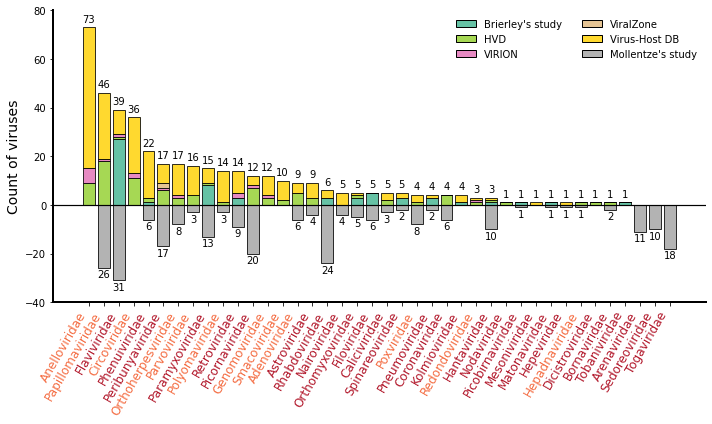

In [1]:
## Supplementary Fig. 1

def stacked_bar_data_if_infect_human_symmetric():
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib.patches import Patch

    # ===== 读取数据 =====
    dt = pd.read_excel(
        "../data/dt_for_human_infectivity_baltimore_new.xlsx",
        sheet_name="dt_for_human_infectivity"
    )
    dt_inf = dt[dt["Label_text"] == "infecting human"].copy()

    # ===== 汇总：每个病毒科 × 数据来源 =====
    df = (
        dt_inf.groupby(["vfam", "data_source_db_brief"])
        .size()
        .reset_index(name="count")
    )

    # ===== 计算排序顺序：除Mollentze's study外的来源总数 =====
    df_sum = (
        df[df["data_source_db_brief"] != "Mollentze's study"]
        .groupby("vfam")["count"]
        .sum()
        .sort_values(ascending=False)
    )
    vfam_order = df_sum.index.tolist()
    # 若有只出现在 Mollentze 的家族，也加到末尾
    others = [v for v in df["vfam"].unique() if v not in vfam_order]
    vfam_order = vfam_order + sorted(others)

    # ===== 透视表（堆积柱状图格式） =====
    df_pivot = df.pivot(index="vfam", columns="data_source_db_brief", values="count").fillna(0)
    df_pivot = df_pivot.loc[vfam_order]

    # ===== 上下分层：Mollentze 向下，其余来源向上 =====
    neg_col = "Mollentze's study"
    if neg_col not in df_pivot.columns:
        df_pivot[neg_col] = 0
    positive_sources = [c for c in df_pivot.columns if c != neg_col]
    negative_source = neg_col

    # ===== 颜色定义 =====
    color_map = {
        "Brierley's study":"#66C2A5", "HVD":"#A6D854", "VIRION":"#E78AC3",
        "Virus-Host DB":"#FFD92F", "ViralZone":"#E5C494", "Mollentze's study":"#B3B3B3"
    }

   
    # ===== x 轴刻度颜色：按 genome_type_brief 上色 =====
    fam2genome = (
        dt_inf.groupby("vfam")["genome_type_brief"]
        .agg(lambda s: s.mode().iat[0] if not s.mode().empty else s.iloc[0])
        .to_dict()
    )
    genome2color = {"RNA viruses": "#B2182B", "DNA viruses": "#F46D43"}

    # ===== 绘图 =====
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    x = np.arange(len(df_pivot))

    # 上半部（正向）：其他来源堆积
    bottom_pos = np.zeros(len(df_pivot))
    for src in positive_sources:
        ax.bar(
            x,
            df_pivot[src].values,
            bottom=bottom_pos,
            color=color_map.get(src, "#bdbdbd"),
            edgecolor="black",
            linewidth=0.8,
            label=src
        )
        bottom_pos += df_pivot[src].values

    # 下半部（负向）：Mollentze
    ax.bar(
        x,
        -df_pivot[negative_source].values,
        bottom=np.zeros(len(df_pivot)),
        color=color_map.get(negative_source, "#bdbdbd"),
        edgecolor="black",
        linewidth=0.8,
        label=negative_source
    )

    # ===== x轴刻度与颜色 =====
    ticklabels = list(df_pivot.index)
    ax.set_xticks(x, ticklabels, rotation=60, ha="right", fontsize=12)
    for ticklabel in ax.get_xticklabels():
        fam = ticklabel.get_text()
        gt = fam2genome.get(fam, None)
        if gt in genome2color:
            ticklabel.set_color(genome2color[gt])

    # ===== y=0 轴线与刻度格式 =====
    ax.axhline(0, color="black", linewidth=1.2)
    """
    ax.yaxis.set_major_formatter(
        FuncFormatter(lambda y, _: f"{int(abs(y))}" if abs(y - int(y)) < 1e-6 else f"{abs(y):.1f}")
    )
    """
    ax.set_ylabel("Count of viruses", fontsize=14)

    # ===== 分别标注：上方=正向总数；下方=负向(Mollentze)数 =====
    pos_sum = df_pivot[positive_sources].sum(axis=1).values if positive_sources else np.zeros(len(df_pivot))
    neg_sum = df_pivot[negative_source].values

    max_pos = pos_sum.max() if len(pos_sum) else 0
    max_neg = neg_sum.max() if len(neg_sum) else 0
    ypad_pos = max(0.02 * max(1, max_pos), 0.6)
    ypad_neg = max(0.02 * max(1, max_neg), 0.6)

    for i in range(len(df_pivot)):
        # 上方只标注“除 Mollentze 外”的总数
        if pos_sum[i] > 0:
            ax.text(
                x[i], pos_sum[i] + ypad_pos, f"{int(pos_sum[i])}",
                ha="center", va="bottom", fontsize=10, fontweight="normal"
            )
        # 下方标注 Mollentze 的数
        if neg_sum[i] > 0:
            ax.text(
                x[i], -neg_sum[i] - ypad_neg, f"{int(neg_sum[i])}",
                ha="center", va="top", fontsize=10, fontweight="normal"
            )
    
    # ===== 图例（右上角，两列，先正向后负向） =====
    handles = [Patch(facecolor=color_map.get(src, "#bdbdbd"), edgecolor="black", label=src)
               for src in positive_sources + [negative_source]]
    ax.legend(
        handles=handles,
        title=None,
        loc="upper right",
        ncol=2,
        fontsize=10,
        frameon=False
    )

    ax.set_ylim(-40, 80)

    plt.tight_layout()

    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.spines["left"].set_linewidth(2)
    ax.spines["bottom"].set_linewidth(2)
    
    plt.savefig(
        "../fig_saved/Supple_Fig1_if_infect_human_data_increasement.pdf",
        format="pdf",
        dpi=300,
        bbox_inches="tight",
        pad_inches=0.1
    )
    plt.show()



if __name__ == "__main__":
    stacked_bar_data_if_infect_human_symmetric()


### Supplementary Fig. 2 Comparison of the number of predicted virus-human PPIs used in human infectivity prediction

<ipython-input-2-65b0d9452dd6>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


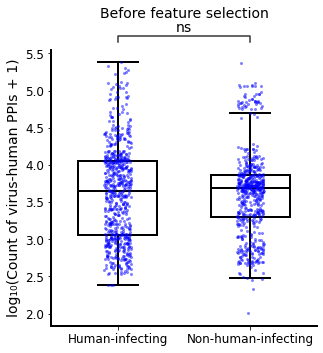

<ipython-input-2-65b0d9452dd6>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


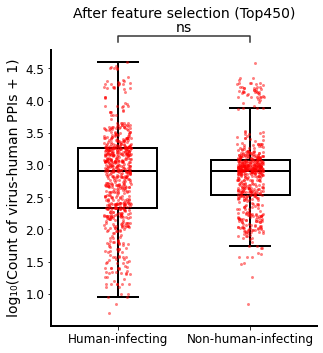

In [2]:
def main_suppl_fig_ppi_distribution_of_humaninfecting_nonhumaninfecting_viruses(before_or_after):
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np
    from statannotations.Annotator import Annotator

    # ===== 参数定义 =====
    if before_or_after == "before":
        title_str = "Before feature selection"
        color_points = "blue"  # 蓝色（Nature风格）
        save_img = "../fig_saved/supple_Fig2C_predicted_PPIs_before_selection.pdf"
        y_label_str = "ppi_count_before"
        log_label_str = "log10_ppi_count_before"
        
        dt_human_infecting = pd.read_csv("../data/df_ppi_before_pos.csv", sep="\t", header=0)
        dt_non_human_infecting = pd.read_csv("../data/df_ppi_before_neg.csv", sep="\t", header=0)
    
    elif before_or_after == "after":
        title_str = "After feature selection (Top450)"
        color_points = "red"  # 橙色（Nature风格）
        save_img = "../fig_saved/supple_Fig2C_predicted_PPIs_after_selection.pdf"
        y_label_str = "ppi_count_after"
        log_label_str = "log10_ppi_count_after"
        
        dt_human_infecting = pd.read_csv("../data/df_ppi_after_pos.csv", sep="\t", header=0)
        dt_non_human_infecting = pd.read_csv("../data/df_ppi_after_neg.csv", sep="\t", header=0)
    
    # ===== 添加分组标签 =====
    dt_human_infecting["group"] = "Human-infecting"
    dt_non_human_infecting["group"] = "Non-human-infecting"

    # ===== 合并数据 =====
    df = pd.concat([dt_human_infecting, dt_non_human_infecting], ignore_index=True)

    # ===== 取 log10(PPI_count + 1) 避免 log(0) =====
    df[log_label_str] = np.log10(df[y_label_str] + 1)

    # ===== 绘图 =====
    plt.figure(figsize=(4.6, 4.8))
    ax = sns.boxplot(
        data=df,
        x="group",
        y=log_label_str,
        palette=["white", "white"],
        width=0.6,
        showfliers=False,
        boxprops=dict(facecolor="white", edgecolor="black", linewidth=2),
        whiskerprops=dict(linewidth=2, color="black"),
        capprops=dict(linewidth=2, color="black"),
        medianprops=dict(color="black", linewidth=2)
    )
    
    sns.stripplot(
        data=df,
        x="group",
        y=log_label_str,
        color=color_points,
        alpha=0.5,
        size=3,
        jitter=True
    )

    # ===== 显著性标注 =====
    pairs = [("Human-infecting", "Non-human-infecting")]
    annotator = Annotator(ax, pairs, data=df, x="group", y=log_label_str)
    annotator.configure(test='t-test_ind', text_format='star', loc='outside', verbose=0, fontsize=14)
    annotator.apply_and_annotate()

    # ===== 图形美化 =====
    ax.set_xlabel("")
    ax.set_ylabel("log₁₀(Count of virus-human PPIs + 1)", fontsize=14)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    
    # 去掉上、右边框
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    # 左、下边框加粗
    ax.spines["left"].set_linewidth(2)
    ax.spines["bottom"].set_linewidth(2)
    
    sns.despine()
    plt.tight_layout()
    plt.title(title_str, fontsize=14, pad=32)

    plt.savefig(save_img,
        format="pdf", 
        dpi=300,
        bbox_inches="tight",
        pad_inches=0.1)
    
    plt.show()


if __name__ == "__main__":
    main_suppl_fig_ppi_distribution_of_humaninfecting_nonhumaninfecting_viruses(before_or_after="before")
    main_suppl_fig_ppi_distribution_of_humaninfecting_nonhumaninfecting_viruses(before_or_after="after")


### Supplementary Fig. 3 Cross-validation performance of genome- and proteome-based models for predicting human infectivity.

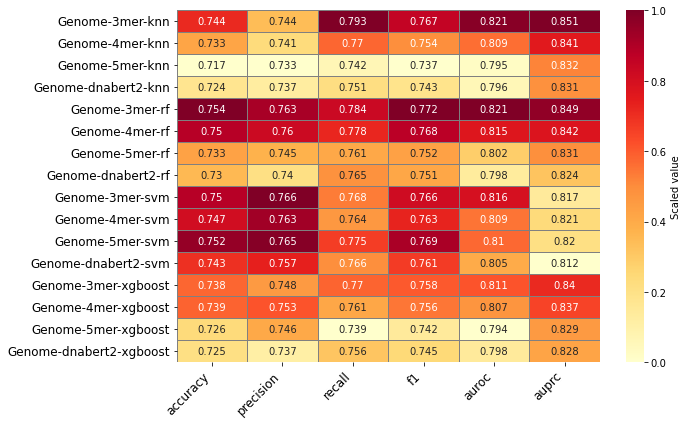

In [ ]:
## Supplementary Fig. 3A Validation results combining Genome-based features (Genome-3mer, 4mer, 5mer, and DNABERT2) with four machine learning algorithms (KNN, RF, SVM, and XGBoost)

def mydataset_genome_feature_ML_selection_heatmap():
    import os
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    from sklearn.preprocessing import MinMaxScaler

    ml_list = ["knn","rf","svm","xgboost"]
    feature_type_list = ["3mer","4mer","5mer","dnabert2"]
    metrics = ["accuracy", "precision", "recall", "f1", "auroc", "auprc"]

    results = []

    # 读取每个方法的均值
    for ml in ml_list:
        for feat in feature_type_list:
            method_name = f"Genome-{feat}-{ml}"
            dt_tmp = pd.read_csv(
                f"../data/supplementary_figs/human_infectivity/genome/{ml}_result_{feat}.csv",
                sep=",", header=0
            )
            mean_values = dt_tmp[metrics].mean().to_dict()
            mean_values["Method"] = method_name
            results.append(mean_values)

    df_mean = pd.DataFrame(results).set_index("Method")

    # ========== 缩放 (0-1) ==========
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(
        scaler.fit_transform(df_mean),
        index=df_mean.index,
        columns=df_mean.columns
    )

    # ========== 绘制热图 ==========
    plt.figure(figsize=(10, 6))
    ax = sns.heatmap(
        df_scaled,
        annot=df_mean.round(3),   # 在热图上标注原始均值
        fmt="g",
        cmap="YlOrRd",
        cbar_kws={"label": "Scaled value"},
        linewidths=0.5,
        linecolor="grey"
    )

    #plt.title("Performance metrics heatmap of con", fontsize=14, fontweight="bold")
    plt.yticks(rotation=0, fontsize=12)
    plt.xticks(rotation=45, ha="right", fontsize=12)
    plt.ylabel("")
    plt.tight_layout()

    plt.savefig("../fig_saved/supple_Fig1A_if_infect_human_control_genome.pdf",
            format="pdf", 
            dpi=300,  # 高分辨率
            bbox_inches="tight", # 防止内容被裁剪
            pad_inches=0.1)  # 添加少许边距
    
    plt.show()


if __name__ == "__main__":
    mydataset_genome_feature_ML_selection_heatmap()

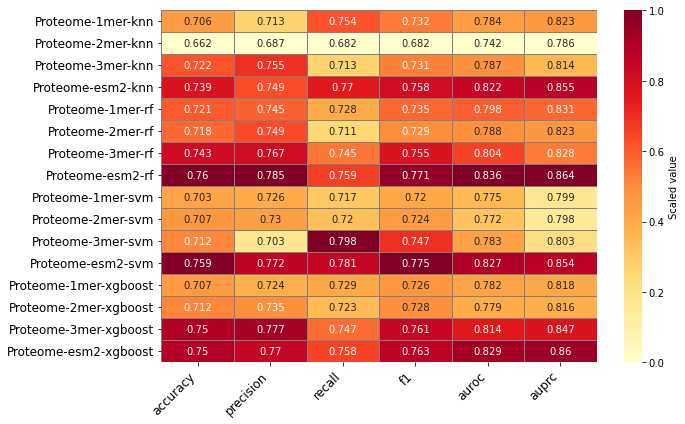

In [5]:
## Supplementary Fig. 3B Validation results combining Proteome-based features (Proteome-1mer, 2mer, 3mer, and ESM2) with the same four algorithms.

def mydataset_proteome_feature_ML_selection_heatmap():
    import os
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    from sklearn.preprocessing import MinMaxScaler

    ml_list = ["knn","rf","svm","xgboost"]
    feature_type_list = ["1mer","2mer","3mer","esm2"]
    metrics = ["accuracy", "precision", "recall", "f1", "auroc", "auprc"]

    results = []

    # 读取每个方法的均值
    for ml in ml_list:
        for feat in feature_type_list:
            method_name = f"Proteome-{feat}-{ml}"
            dt_tmp = pd.read_csv(
                f"../data/supplementary_figs/human_infectivity/proteome/{ml}_result_{feat}.csv",
                sep=",", header=0
            )
            mean_values = dt_tmp[metrics].mean().to_dict()
            mean_values["Method"] = method_name
            results.append(mean_values)

    df_mean = pd.DataFrame(results).set_index("Method")

    # ========== 缩放 (0-1) ==========
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(
        scaler.fit_transform(df_mean),
        index=df_mean.index,
        columns=df_mean.columns
    )

    # ========== 绘制热图 ==========
    plt.figure(figsize=(10, 6))
    ax = sns.heatmap(
        df_scaled,
        annot=df_mean.round(3),   # 在热图上标注原始均值
        fmt="g",
        cmap="YlOrRd",
        cbar_kws={"label": "Scaled value"},
        linewidths=0.5,
        linecolor="grey"
    )

    #plt.title("Performance metrics heatmap of con", fontsize=14, fontweight="bold")
    plt.yticks(rotation=0, fontsize=12)
    plt.xticks(rotation=45, ha="right", fontsize=12)
    plt.ylabel("")
    plt.tight_layout()

    plt.savefig("../fig_saved/supple_Fig1B_if_infect_human_control_proteome.pdf",
            format="pdf", 
            dpi=300,  # 高分辨率
            bbox_inches="tight", # 防止内容被裁剪
            pad_inches=0.1)  # 添加少许边距
    plt.show()


if __name__ == "__main__":
    mydataset_proteome_feature_ML_selection_heatmap()

### Supplementary Fig. 4 Performance of Mollentze’s and PPI-based model for predicting human infectivity on Mollentze’s dataset.

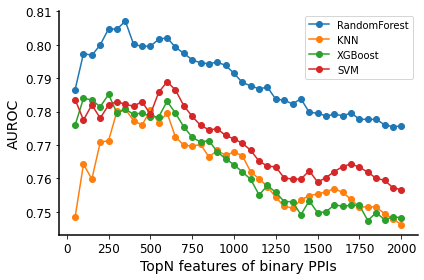

In [13]:
## Supplementary Fig. 4A AUROC performance using the TopN (N=50, 100, …, 2000) binary PPI features across the four algorithms.

def curve_TopNppi_AUROC():
    import pandas as pd
    import matplotlib.pyplot as plt

    # 读取Excel文件
    df = pd.read_excel('../data/supplementary_figs/human_infectivity/summary_plot_binary_ppi_paperdataset.xlsx', sheet_name="Sheet1", header=0)

    # 设置画布大小
    plt.figure(figsize=(6,4))  # 宽8英寸，高6英寸，可以根据需要调整

    # 图例映射字典
    label_map = {
        "RF": "RandomForest",
        "XGBOOST": "XGBoost",
        "KNN": "KNN",
        "SVM": "SVM"
    }

    # 绘制每一列（除了top列）对应的折线图
    for col in df.columns[1:]:
        name = col.replace('_auc', '').upper()
        label = label_map.get(name, name)  # 如果在字典中就替换，否则保持原样
        plt.plot(df['top'], df[col], marker='o', label=label)


    # 设置坐标轴标签和标题，字体调大
    plt.xlabel('TopN features of binary PPIs', fontsize=14)
    plt.ylabel('AUROC', fontsize=14)


    # 调大刻度字体
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # 去掉上方和右侧的框线，加粗左侧和下方
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    # 图例字体调大
    plt.legend(fontsize=10)

    plt.tight_layout()

    plt.savefig("../fig_saved/supple_Fig2D_if_infecting_human_test_result_paperdataset.pdf",
                format="pdf", 
                dpi=300,  # 高分辨率
                bbox_inches="tight", # 防止内容被裁剪
                pad_inches=0.1)  # 添加少许边距

    plt.show()


if __name__ == "__main__":
    curve_TopNppi_AUROC()

0.7372635327635324
0.8375331079177228


<ipython-input-8-94f722016003>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


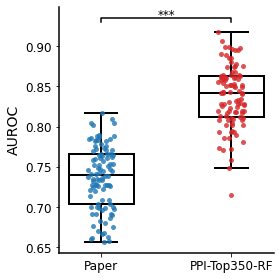

In [8]:
## Supplementary Fig. 4B AUROC comparison of Mollentze’s and PPI-based model on independent test set of Mollentze’s dataset.

def boxplot_test_auroc_paperdataset():
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    
    from scipy.stats import ttest_ind
    import seaborn as sns
    

    df = pd.read_excel("../data/supplementary_figs/human_infectivity/result_for_figure.xlsx", sheet_name="paperdataset_test_auroc", header=0)
    df_long = df.melt(var_name="Method", value_name="Value")
    df_long = df_long[df_long["Method"].isin(["Paper", "PPI-Top350-RF"])].reset_index(drop=True)
    print(np.mean(df_long[df_long["Method"]=="Paper"]["Value"]))
    print(np.mean(df_long[df_long["Method"]=="PPI-Top350-RF"]["Value"]))
    
    # 手动指定顺序（保证x轴顺序固定）
    order = ["Paper", "PPI-Top350-RF"]
    palette = {
        "Paper": "#1f77b4",
        "PPI-Top350-RF": "#d62728"
    }
    
    # ========== 绘图 ==========
    plt.figure(figsize=(4,4))
    
    sns.boxplot(
        data=df_long, x="Method", y="Value",
        order=order, palette=palette, width=0.5, showfliers=False,
        boxprops=dict(facecolor="white", edgecolor="black", linewidth=2),
        whiskerprops=dict(linewidth=2, color="black"),
        capprops=dict(linewidth=2, color="black"),
        medianprops=dict(color="black", linewidth=2)
    )
    
    # 散点（按方法上色）
    for method in order:
        subset = df_long[df_long["Method"] == method]
        sns.stripplot(
            data=subset, x="Method", y="Value",
            order=order, jitter=True, size=5, alpha=0.8,
            color=palette[method]
        )
    
    plt.xticks(rotation=0, fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel("AUROC", fontsize=14)
    plt.xlabel("")

    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["bottom"].set_linewidth(1.5)
    
    # ========== 显著性检验 ==========
    ref = "PPI-Top350-RF"
    groups = ["Paper"]
    
    p_values = {}
    for g in groups:
        vals1 = df[g].dropna()
        vals2 = df[ref].dropna()
        stat, p = ttest_ind(vals1, vals2)
        p_values[g] = p
    
    # ========== 在图上标注显著性 ==========
    y_max = df_long["Value"].max()
    height = (df_long["Value"].max() - df_long["Value"].min()) * 0.05
    offset = height * 0.3
    
    for i, g in enumerate(groups):
        x1 = order.index(g)
        x2 = order.index(ref)
        y = y_max + (i+1)*height
        p = p_values[g]
    
        # 横线
        plt.plot([x1, x1, x2, x2], [y, y+0.005, y+0.005, y], lw=1.5, color="black")
    
        # 显著性标记
        if p < 0.001:
            text = "***"
        elif p < 0.01:
            text = "**"
        elif p < 0.05:
            text = "*"
        else:
            text = "ns"
    
        plt.text((x1+x2)/2, y+0.005-offset, text, ha="center", va="bottom", fontsize=12)
    
    plt.tight_layout()


    plt.savefig("../fig_saved/supple_Fig2C_if_infecting_human_TopN_paperdataset.pdf",
            format="pdf", 
            dpi=300,  # 高分辨率
            bbox_inches="tight", # 防止内容被裁剪
            pad_inches=0.1)  # 添加少许边距
    
    plt.show()
    
    
if __name__ == "__main__":
    boxplot_test_auroc_paperdataset()

### Supplementary Fig. 5 Cross-validation results of predicting viral transmissibility (TMS), transmission route (TRO), and tissue tropism (TT).

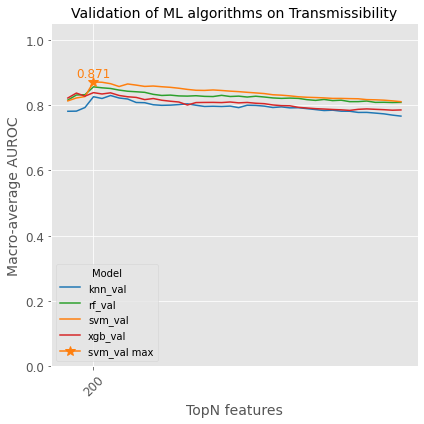

In [ ]:
## Supplementary Fig. 5A-C Validation AUROC using the TopN (N=50, 100, …, 2000) binary PPI features across machine learning algorithms (KNN, RF, SVM, and XGBoost) on prediction of transmissibility (A), transmission route (B), and tissue tropism (C).

### Supplementary Fig. 5A

import pandas as pd
import matplotlib.pyplot as plt
import os


def Transmissibility_ML_selection_val_experiment():
    plt.style.use("ggplot")
    
    colors = {
        "knn_val": "#1f77b4",
        "rf_val": "#2ca02c",
        "svm_val": "#ff7f0e",
        "xgb_val": "#d62728"
    }
    
    labels = ["Trlevel"]
    
    for label in labels:
        filename = f"../data/supplementary_figs/transmissibility/auc_summary_{label}_v1.csv"
        if not os.path.exists(filename):
            print(f"文件不存在：{filename}")
            continue
    
        df = pd.read_csv(filename, index_col=0)
    
        plt.figure(figsize=(6, 6))
    
        global_max_val = -1
        global_max_idx = None
        global_max_model = None
    
        for model in df.columns:
            plt.plot(df.index, df[model], label=model, color=colors.get(model, None))
    
            # 查找全局最大值
            model_max = df[model].max()
            if model_max > global_max_val:
                global_max_val = model_max
                global_max_idx = df[model].idxmax()
                global_max_model = model
    
        # 标记全局最大值点
        if global_max_model:
            plt.plot(global_max_idx, global_max_val, marker='*',
                     color=colors.get(global_max_model, None), markersize=10,
                     label=f'{global_max_model} max')
            plt.text(global_max_idx, global_max_val + 0.015, f'{global_max_val:.3f}',
                     ha='center', fontsize=12, color=colors.get(global_max_model, None))
    
            # 只显示该点的x轴标签
            plt.xticks(ticks=[global_max_idx], labels=[global_max_idx], rotation=45)
        
        plt.title(f"Validation of ML algorithms on Transmissibility", fontsize=14)
        plt.xlabel("TopN features", fontsize=14)
        plt.ylabel("Macro-average AUROC", fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.ylim(0, 1.05)
        plt.legend(title="Model", fontsize=10)
        
        plt.tight_layout()
        
        plt.savefig("../fig_saved/Supple_Fig3A_transmissibility_auroc.pdf",
            format="pdf", 
            dpi=300,  # 高分辨率
            bbox_inches="tight", # 防止内容被裁剪
            pad_inches=0.1)  # 添加少许边距
        
        plt.show()
        


if __name__ == "__main__":
    Transmissibility_ML_selection_val_experiment()

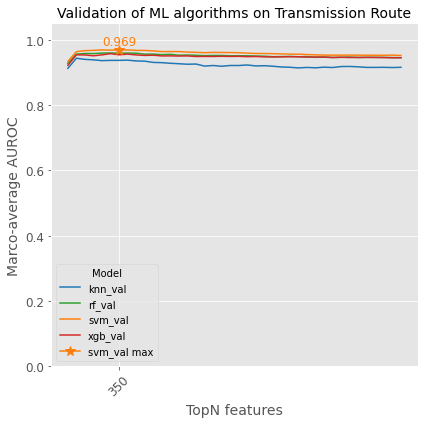

In [15]:
### Supplementary Fig. 5B

import pandas as pd
import matplotlib.pyplot as plt
import os


def Transmission_Route_ML_selection_val_experiment():
    plt.style.use("ggplot")
    
    colors = {
        "knn_val": "#1f77b4",
        "rf_val": "#2ca02c",
        "svm_val": "#ff7f0e",
        "xgb_val": "#d62728"
    }
    
    labels = ["Trprimary"]
    
    for label in labels:
        filename = f"../data/supplementary_figs/transmission_route/auc_summary_{label}_v1.csv"
        if not os.path.exists(filename):
            print(f"文件不存在：{filename}")
            continue
    
        df = pd.read_csv(filename, index_col=0)
    
        plt.figure(figsize=(6, 6))
    
        global_max_val = -1
        global_max_idx = None
        global_max_model = None
    
        for model in df.columns:
            plt.plot(df.index, df[model], label=model, color=colors.get(model, None))
    
            # 查找全局最大值
            model_max = df[model].max()
            if model_max > global_max_val:
                global_max_val = model_max
                global_max_idx = df[model].idxmax()
                global_max_model = model
    
        # 标记全局最大值点
        if global_max_model:
            plt.plot(global_max_idx, global_max_val, marker='*',
                     color=colors.get(global_max_model, None), markersize=10,
                     label=f'{global_max_model} max')
            plt.text(global_max_idx, global_max_val + 0.015, f'{global_max_val:.3f}',
                     ha='center', fontsize=12, color=colors.get(global_max_model, None))
    
            # 只显示该点的x轴标签
            plt.xticks(ticks=[global_max_idx], labels=[global_max_idx], rotation=45)
    
        plt.title(f"Validation of ML algorithms on Transmission Route", fontsize=14)
        plt.xlabel("TopN features", fontsize=14)
        plt.ylabel("Marco-average AUROC", fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.ylim(0, 1.05)
        plt.legend(title="Model", fontsize=10)
        plt.tight_layout()

        plt.savefig("../fig_saved/Supple_Fig3A_transmission_route_auroc.pdf",
            format="pdf", 
            dpi=300,  # 高分辨率
            bbox_inches="tight", # 防止内容被裁剪
            pad_inches=0.1)  # 添加少许边距
        
        plt.show()


if __name__ == "__main__":
    Transmission_Route_ML_selection_val_experiment()

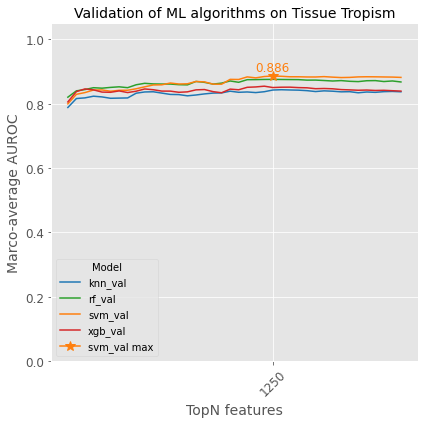

In [16]:
### Supplementary Fig. 5C

import pandas as pd
import matplotlib.pyplot as plt
import os


def Tissue_Tropism_ML_selection_val_experiment():
    colors = {
        "knn_val": "#1f77b4",
        "rf_val": "#2ca02c",
        "svm_val": "#ff7f0e",
        "xgb_val": "#d62728"
    }
    
    labels = ["XX"]
    
    for label in labels:
        filename = f"../data/supplementary_figs/tissue_tropism/auc_summary_Tpprimary_v1.csv"
        if not os.path.exists(filename):
            print(f"文件不存在：{filename}")
            continue
    
        df = pd.read_csv(filename, index_col=0)
    
        plt.figure(figsize=(6, 6))
    
        global_max_val = -1
        global_max_idx = None
        global_max_model = None
    
        for model in df.columns:
            plt.plot(df.index, df[model], label=model, color=colors.get(model, None))
    
            # 查找全局最大值
            model_max = df[model].max()
            if model_max > global_max_val:
                global_max_val = model_max
                global_max_idx = df[model].idxmax()
                global_max_model = model
    
        # 标记全局最大值点
        if global_max_model:
            plt.plot(global_max_idx, global_max_val, marker='*',
                     color=colors.get(global_max_model, None), markersize=10,
                     label=f'{global_max_model} max')
            plt.text(global_max_idx, global_max_val + 0.015, f'{global_max_val:.3f}',
                     ha='center', fontsize=12, color=colors.get(global_max_model, None))
    
            # 只显示该点的x轴标签
            plt.xticks(ticks=[global_max_idx], labels=[global_max_idx], rotation=45)
    
        plt.title(f"Validation of ML algorithms on Tissue Tropism", fontsize=14)
        plt.xlabel("TopN features", fontsize=14)
        plt.ylabel("Marco-average AUROC", fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.ylim(0, 1.05)
        plt.legend(title="Model", fontsize=10)
        plt.tight_layout()

        plt.savefig("../fig_saved/Supple_Fig3A_tissue_tropism_auroc.pdf",
            format="pdf", 
            dpi=300,  # 高分辨率
            bbox_inches="tight", # 防止内容被裁剪
            pad_inches=0.1)  # 添加少许边距
        
        plt.show()


if __name__ == "__main__":
    Tissue_Tropism_ML_selection_val_experiment()

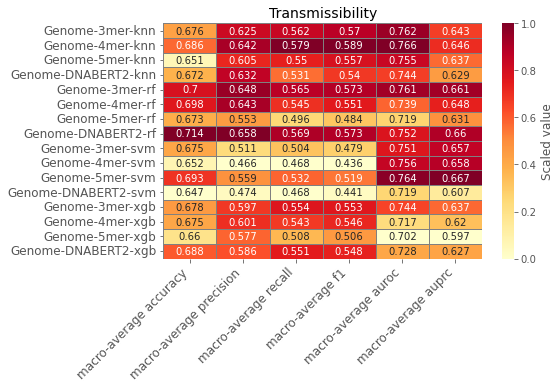

In [ ]:
## Supplementary Figure 5 D–F. Validation results combining Genome-based features (Genome-3mer, 4mer, 5mer, and DNABERT2) with six machine-learning algorithms (KNN, SVM, XGBoost, and RF) for predicting transmissibility (D), transmission route (E), and tissue tropism (F).

def transmissibility_genome_feature_ML_selection_heatmap():
    import os
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    from sklearn.metrics import (
        accuracy_score, precision_score, recall_score, f1_score,
        roc_auc_score, average_precision_score
    )
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import label_binarize


    ml_list = ["knn", "rf", "svm", "xgb"]
    feature_type_list = ["3mer", "4mer", "5mer", "dnabert"]
    metrics = ["accuracy", "precision", "recall", "f1", "auroc", "auprc"]

    results = []

    # 遍历所有方法
    for ml in ml_list:
        for feat in feature_type_list:
            method_name = f"Genome-{feat}-{ml}"
            metric_values_list = []

            # 遍历100个文件
            for idx in range(0, 100):
                if feat != "dnabert":
                    filename = f"../data/supplementary_figs/transmissibility/val/{ml}_genome/Trlevel_{feat}/probs_split{idx}.csv"
                else:
                    filename = f"../data/supplementary_figs/transmissibility/val/{ml}_dnabert/Trlevel/probs_split{idx}.csv"
                if not os.path.exists(filename):
                    print("缺失文件:", filename)
                    continue

                dt_tmp = pd.read_csv(filename, sep=",", header=0)
                dt_tmp.columns = ["prob_2", "prob_3", "prob_4"]+list(dt_tmp.columns)[3:]
                y_true = dt_tmp["true"].values
                y_pred = dt_tmp["pred"].values
                y_prob = dt_tmp[["prob_2", "prob_3", "prob_4"]].values
                
                # ==== 计算指标 ====
                acc = accuracy_score(y_true, y_pred)
                prec = precision_score(y_true, y_pred, average="macro", zero_division=0)
                rec = recall_score(y_true, y_pred, average="macro", zero_division=0)
                f1 = f1_score(y_true, y_pred, average="macro", zero_division=0)

                # 多分类 one-vs-rest 概率输入
                classes = [2, 3, 4]
                try:
                    y_true_bin = label_binarize(y_true, classes=classes)
                    auroc = roc_auc_score(y_true_bin, y_prob, average="macro", multi_class="ovr")
                except ValueError:
                    auroc = np.nan

                try:
                    y_true_bin = label_binarize(y_true, classes=classes)
                    auprc = average_precision_score(y_true_bin, y_prob, average="macro")
                except ValueError:
                    auprc = np.nan

                metric_values_list.append([acc, prec, rec, f1, auroc, auprc])

            # 对100次实验结果取均值
            if len(metric_values_list) > 0:
                mean_values = np.nanmean(metric_values_list, axis=0)
                tmp_dict = dict(zip(metrics, mean_values))
                tmp_dict["Method"] = method_name
                results.append(tmp_dict)

    # 生成 DataFrame
    df_mean = pd.DataFrame(results).set_index("Method")
    df_mean.index = df_mean.index.str.replace("dnabert", "DNABERT2", regex=False)

    # ========== 缩放 (0-1) ==========
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(
        scaler.fit_transform(df_mean),
        index=df_mean.index,
        columns=df_mean.columns
    )

    # ========== 绘制热图 ==========
    plt.figure(figsize=(8, 5.5))
    ax = sns.heatmap(
        df_scaled,
        annot=df_mean.round(3),   # 标注原始均值
        fmt="g",
        cmap="YlOrRd",
        cbar_kws={"label": "Scaled value"},
        linewidths=0.5,
        linecolor="grey"
    )

    plt.title("Transmissibility", fontsize=14)
    plt.yticks(rotation=0, fontsize=12)
    #plt.xticks(rotation=45, ha="right", fontsize=12)
    metrics_display = ["macro-average accuracy", "macro-average precision", "macro-average recall", 
                      "macro-average f1", "macro-average auroc", "macro-average auprc"]
    
    plt.xticks(ticks=np.arange(len(metrics)) + 0.5, 
               labels=metrics_display, 
               rotation=45, ha="right", fontsize=12)
    
    
    plt.ylabel("")
    plt.tight_layout()
    
    plt.savefig("../fig_saved/Supple_Fig3B_transmissibility_genome.pdf",
            format="pdf", 
            dpi=300,  # 高分辨率
            bbox_inches="tight", # 防止内容被裁剪
            pad_inches=0.1)  # 添加少许边距
    
    plt.show()


if __name__ == "__main__":
    transmissibility_genome_feature_ML_selection_heatmap()


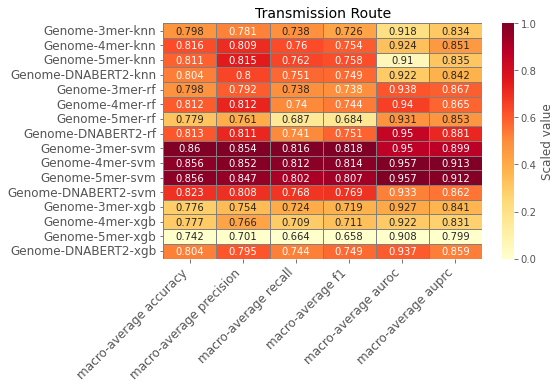

In [20]:
def transmission_route_genome_feature_ML_selection_heatmap():
    import os
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    from sklearn.metrics import (
        accuracy_score, precision_score, recall_score, f1_score,
        roc_auc_score, average_precision_score
    )
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import label_binarize


    ml_list = ["knn", "rf", "svm", "xgb"]
    feature_type_list = ["3mer", "4mer", "5mer", "dnabert"]
    metrics = ["accuracy", "precision", "recall", "f1", "auroc", "auprc"]

    results = []

    # 遍历所有方法
    for ml in ml_list:
        for feat in feature_type_list:
            method_name = f"Genome-{feat}-{ml}"
            metric_values_list = []

            # 遍历100个文件
            for idx in range(0, 100):
                if feat != "dnabert":
                    filename = f"../data/supplementary_figs/transmission_route/result_kmer/{ml}_genome/Trprimary_{feat}/probs_split{idx}.csv"
                else:
                    filename = f"../data/supplementary_figs/transmission_route/result_LLM/{ml}_dnabert/Trprimary/probs_split{idx}.csv"
                if not os.path.exists(filename):
                    print("缺失文件:", filename)
                    continue

                dt_tmp = pd.read_csv(filename, sep=",", header=0)
                dt_tmp.columns = ["prob_direct contact","prob_faecal-oral","prob_respiratory","prob_vector"]+list(dt_tmp.columns)[4:]
                y_true = dt_tmp["true"].values
                y_pred = dt_tmp["pred"].values
                y_prob = dt_tmp[["prob_direct contact","prob_faecal-oral","prob_respiratory","prob_vector"]].values
                
                # ==== 计算指标 ====
                acc = accuracy_score(y_true, y_pred)
                prec = precision_score(y_true, y_pred, average="macro", zero_division=0)
                rec = recall_score(y_true, y_pred, average="macro", zero_division=0)
                f1 = f1_score(y_true, y_pred, average="macro", zero_division=0)

                # 多分类 one-vs-rest 概率输入
                classes = ["direct contact","faecal-oral","respiratory","vector"]
                try:
                    y_true_bin = label_binarize(y_true, classes=classes)
                    auroc = roc_auc_score(y_true_bin, y_prob, average="macro", multi_class="ovr")
                except ValueError:
                    auroc = np.nan

                try:
                    y_true_bin = label_binarize(y_true, classes=classes)
                    auprc = average_precision_score(y_true_bin, y_prob, average="macro")
                except ValueError:
                    auprc = np.nan

                metric_values_list.append([acc, prec, rec, f1, auroc, auprc])

            # 对100次实验结果取均值
            if len(metric_values_list) > 0:
                mean_values = np.nanmean(metric_values_list, axis=0)
                tmp_dict = dict(zip(metrics, mean_values))
                tmp_dict["Method"] = method_name
                results.append(tmp_dict)

    # 生成 DataFrame
    df_mean = pd.DataFrame(results).set_index("Method")
    df_mean.index = df_mean.index.str.replace("dnabert", "DNABERT2", regex=False)

    # ========== 缩放 (0-1) ==========
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(
        scaler.fit_transform(df_mean),
        index=df_mean.index,
        columns=df_mean.columns
    )

    # ========== 绘制热图 ==========
    plt.figure(figsize=(8, 5.5))
    ax = sns.heatmap(
        df_scaled,
        annot=df_mean.round(3),   # 标注原始均值
        fmt="g",
        cmap="YlOrRd",
        cbar_kws={"label": "Scaled value"},
        linewidths=0.5,
        linecolor="grey"
    )

    plt.title("Transmission Route", fontsize=14)
    plt.yticks(rotation=0, fontsize=12)
    #plt.xticks(rotation=45, ha="right", fontsize=12)
    metrics_display = ["macro-average accuracy", "macro-average precision", "macro-average recall", 
                      "macro-average f1", "macro-average auroc", "macro-average auprc"]
    
    plt.xticks(ticks=np.arange(len(metrics)) + 0.5, 
               labels=metrics_display, 
               rotation=45, ha="right", fontsize=12)
    
    
    plt.ylabel("")
    plt.tight_layout()

    plt.savefig("../fig_saved/Supple_Fig3B_transmission_route_genome.pdf",
            format="pdf", 
            dpi=300,  # 高分辨率
            bbox_inches="tight", # 防止内容被裁剪
            pad_inches=0.1)  # 添加少许边距
    
    plt.show()


if __name__ == "__main__":
    transmission_route_genome_feature_ML_selection_heatmap()


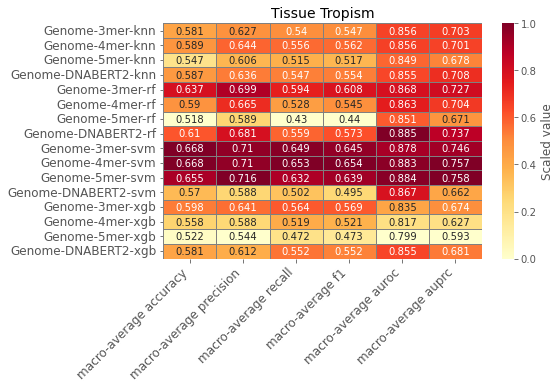

In [23]:
def tissue_tropism_genome_feature_ML_selection_heatmap():
    import os
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    from sklearn.metrics import (
        accuracy_score, precision_score, recall_score, f1_score,
        roc_auc_score, average_precision_score
    )
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import label_binarize

    
    ml_list = ["knn", "rf", "svm", "xgb"]
    feature_type_list = ["3mer", "4mer", "5mer", "dnabert"]
    metrics = ["accuracy", "precision", "recall", "f1", "auroc", "auprc"]

    results = []

    # 遍历所有方法
    for ml in ml_list:
        for feat in feature_type_list:
            method_name = f"Genome-{feat}-{ml}"
            metric_values_list = []

            # 遍历100个文件
            for idx in range(0, 100):
                if feat != "dnabert":
                    filename = f"../data/supplementary_figs/tissue_tropism/result_20other_kmer/{ml}_genome/Tpprimary_{feat}/probs_split{idx}.csv"
                else:
                    filename = f"../data/supplementary_figs/tissue_tropism/result_20other_LLM/{ml}_dnabert/Tpprimary/probs_split{idx}.csv"
                if not os.path.exists(filename):
                    print("缺失文件:", filename)
                    continue

                dt_tmp = pd.read_csv(filename, sep=",", header=0)
                dt_tmp.columns = ["prob_gastrointestinal","prob_neural","prob_other","prob_respiratory","prob_systemic","prob_viraemic"]+list(dt_tmp.columns)[6:]
                y_true = dt_tmp["true"].values
                y_pred = dt_tmp["pred"].values
                y_prob = dt_tmp[["prob_gastrointestinal","prob_neural","prob_other","prob_respiratory","prob_systemic","prob_viraemic"]].values
                
                # ==== 计算指标 ====
                acc = accuracy_score(y_true, y_pred)
                prec = precision_score(y_true, y_pred, average="macro", zero_division=0)
                rec = recall_score(y_true, y_pred, average="macro", zero_division=0)
                f1 = f1_score(y_true, y_pred, average="macro", zero_division=0)
                
                # 多分类 one-vs-rest 概率输入
                classes = np.unique(y_true)
                if len(classes) < 2:
                    auroc = np.nan
                    auprc = np.nan
                else:
                    try:
                        y_true_bin = label_binarize(y_true, classes=classes)
                        auroc = roc_auc_score(y_true_bin, y_prob[:, :len(classes)], 
                                              average="macro", multi_class="ovr")
                    except ValueError:
                        auroc = np.nan

                    try:
                        y_true_bin = label_binarize(y_true, classes=classes)
                        auprc = average_precision_score(y_true_bin, y_prob[:, :len(classes)], 
                                                        average="macro")
                    except ValueError:
                        auprc = np.nan

                metric_values_list.append([acc, prec, rec, f1, auroc, auprc])

            # 对100次实验结果取均值
            if len(metric_values_list) > 0:
                mean_values = np.nanmean(metric_values_list, axis=0)
                tmp_dict = dict(zip(metrics, mean_values))
                tmp_dict["Method"] = method_name
                results.append(tmp_dict)

    # 生成 DataFrame
    df_mean = pd.DataFrame(results).set_index("Method")
    df_mean.index = df_mean.index.str.replace("dnabert", "DNABERT2", regex=False)

    # ========== 缩放 (0-1) ==========
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(
        scaler.fit_transform(df_mean),
        index=df_mean.index,
        columns=df_mean.columns
    )

    # ========== 绘制热图 ==========
    plt.figure(figsize=(8, 5.5))
    ax = sns.heatmap(
        df_scaled,
        annot=df_mean.round(3),   # 标注原始均值
        fmt="g",
        cmap="YlOrRd",
        cbar_kws={"label": "Scaled value"},
        linewidths=0.5,
        linecolor="grey"
    )

    plt.title("Tissue Tropism", fontsize=14)
    plt.yticks(rotation=0, fontsize=12)
    #plt.xticks(rotation=45, ha="right", fontsize=12)
    metrics_display = ["macro-average accuracy", "macro-average precision", "macro-average recall", 
                      "macro-average f1", "macro-average auroc", "macro-average auprc"]
    
    plt.xticks(ticks=np.arange(len(metrics)) + 0.5, 
               labels=metrics_display, 
               rotation=45, ha="right", fontsize=12)
    
    
    plt.ylabel("")
    plt.tight_layout()

    plt.savefig("../fig_saved/Supple_Fig3B_tissue_tropism_genome.pdf",
            format="pdf", 
            dpi=300,  # 高分辨率
            bbox_inches="tight", # 防止内容被裁剪
            pad_inches=0.1)  # 添加少许边距
    
    plt.show()


if __name__ == "__main__":
    tissue_tropism_genome_feature_ML_selection_heatmap()


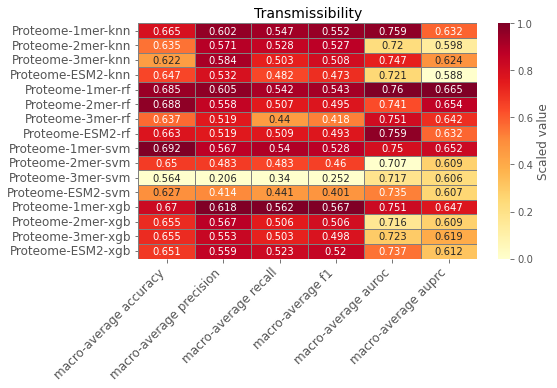

In [26]:
## Supplementary Figure 5 G-I Validation results combining Proteome-based features (Proteome-1mer, 2mer, 3mer, and ESM2) with the same six algorithms for predicting transmissibility (G), transmission route (H), and tissue tropism (I).

def transmissibility_proteome_feature_ML_selection_heatmap():
    import os
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    from sklearn.metrics import (
        accuracy_score, precision_score, recall_score, f1_score,
        roc_auc_score, average_precision_score
    )
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import label_binarize

    ml_list = ["knn", "rf", "svm", "xgb"]
    feature_type_list = ["1mer", "2mer", "3mer", "esm"]
    metrics = ["accuracy", "precision", "recall", "f1", "auroc", "auprc"]

    results = []

    # 遍历所有方法
    for ml in ml_list:
        for feat in feature_type_list:
            method_name = f"Proteome-{feat}-{ml}"
            metric_values_list = []

            # 遍历100个文件
            for idx in range(0, 100):
                if feat != "esm":
                    filename = f"../data/supplementary_figs/transmissibility/val/{ml}_proteome/Trlevel_{feat}/probs_split{idx}.csv"
                else:
                    filename = f"../data/supplementary_figs/transmissibility/val/{ml}_esm/Trlevel/probs_split{idx}.csv"
                if not os.path.exists(filename):
                    print("缺失文件:", filename)
                    continue

                dt_tmp = pd.read_csv(filename, sep=",", header=0)
                dt_tmp.columns = ["prob_2", "prob_3", "prob_4"]+list(dt_tmp.columns)[3:]
                y_true = dt_tmp["true"].values
                y_pred = dt_tmp["pred"].values
                y_prob = dt_tmp[["prob_2", "prob_3", "prob_4"]].values
                
                # ==== 计算指标 ====
                acc = accuracy_score(y_true, y_pred)
                prec = precision_score(y_true, y_pred, average="macro", zero_division=0)
                rec = recall_score(y_true, y_pred, average="macro", zero_division=0)
                f1 = f1_score(y_true, y_pred, average="macro", zero_division=0)

                # 多分类 one-vs-rest 概率输入
                classes = [2, 3, 4]
                try:
                    y_true_bin = label_binarize(y_true, classes=classes)
                    auroc = roc_auc_score(y_true_bin, y_prob, average="macro", multi_class="ovr")
                except ValueError:
                    auroc = np.nan

                try:
                    y_true_bin = label_binarize(y_true, classes=classes)
                    auprc = average_precision_score(y_true_bin, y_prob, average="macro")
                except ValueError:
                    auprc = np.nan

                metric_values_list.append([acc, prec, rec, f1, auroc, auprc])

            # 对100次实验结果取均值
            if len(metric_values_list) > 0:
                mean_values = np.nanmean(metric_values_list, axis=0)
                tmp_dict = dict(zip(metrics, mean_values))
                tmp_dict["Method"] = method_name
                results.append(tmp_dict)

    # 生成 DataFrame
    df_mean = pd.DataFrame(results).set_index("Method")
    df_mean.index = df_mean.index.str.replace("esm", "ESM2", regex=False)

    # ========== 缩放 (0-1) ==========
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(
        scaler.fit_transform(df_mean),
        index=df_mean.index,
        columns=df_mean.columns
    )

    # ========== 绘制热图 ==========
    plt.figure(figsize=(8, 5.5))
    ax = sns.heatmap(
        df_scaled,
        annot=df_mean.round(3),   # 标注原始均值
        fmt="g",
        cmap="YlOrRd",
        cbar_kws={"label": "Scaled value"},
        linewidths=0.5,
        linecolor="grey"
    )

    plt.title("Transmissibility", fontsize=14)
    plt.yticks(rotation=0, fontsize=12)
    #plt.xticks(rotation=45, ha="right", fontsize=12)
    metrics_display = ["macro-average accuracy", "macro-average precision", "macro-average recall", 
                      "macro-average f1", "macro-average auroc", "macro-average auprc"]
    
    plt.xticks(ticks=np.arange(len(metrics)) + 0.5, 
               labels=metrics_display, 
               rotation=45, ha="right", fontsize=12)
    
    
    plt.ylabel("")
    plt.tight_layout()

    plt.savefig("../fig_saved/Supple_Fig3B_transmissibility_proteome.pdf",
            format="pdf", 
            dpi=300,  # 高分辨率
            bbox_inches="tight", # 防止内容被裁剪
            pad_inches=0.1)  # 添加少许边距
    plt.show()


if __name__ == "__main__":
    transmissibility_proteome_feature_ML_selection_heatmap()


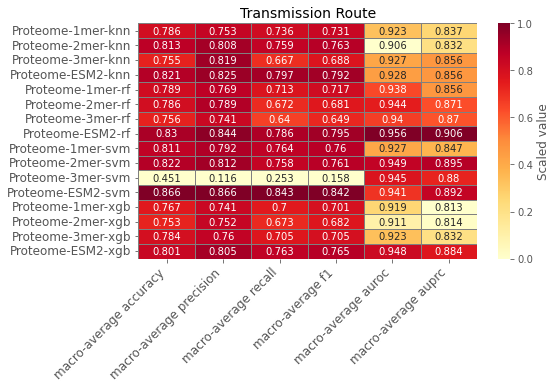

In [25]:
def transmission_route_proteome_feature_ML_selection_heatmap():
    import os
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    from sklearn.metrics import (
        accuracy_score, precision_score, recall_score, f1_score,
        roc_auc_score, average_precision_score
    )
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import label_binarize
    
    ml_list = ["knn", "rf", "svm", "xgb"]
    feature_type_list = ["1mer", "2mer", "3mer", "esm"]
    metrics = ["accuracy", "precision", "recall", "f1", "auroc", "auprc"]

    results = []

    # 遍历所有方法
    for ml in ml_list:
        for feat in feature_type_list:
            method_name = f"Proteome-{feat}-{ml}"
            metric_values_list = []

            # 遍历100个文件
            for idx in range(0, 100):
                if feat != "esm":
                    filename = f"../data/supplementary_figs/transmission_route/result_kmer/{ml}_proteome/Trprimary_{feat}/probs_split{idx}.csv"
                else:
                    filename = f"../data/supplementary_figs/transmission_route/result_LLM/{ml}_esm/Trprimary/probs_split{idx}.csv"
                if not os.path.exists(filename):
                    print("缺失文件:", filename)
                    continue

                dt_tmp = pd.read_csv(filename, sep=",", header=0)
                dt_tmp.columns = ["prob_direct contact","prob_faecal-oral","prob_respiratory","prob_vector"]+list(dt_tmp.columns)[4:]
                y_true = dt_tmp["true"].values
                y_pred = dt_tmp["pred"].values
                y_prob = dt_tmp[["prob_direct contact","prob_faecal-oral","prob_respiratory","prob_vector"]].values
                
                # ==== 计算指标 ====
                acc = accuracy_score(y_true, y_pred)
                prec = precision_score(y_true, y_pred, average="macro", zero_division=0)
                rec = recall_score(y_true, y_pred, average="macro", zero_division=0)
                f1 = f1_score(y_true, y_pred, average="macro", zero_division=0)

                # 多分类 one-vs-rest 概率输入
                classes = ["direct contact","faecal-oral","respiratory","vector"]
                try:
                    y_true_bin = label_binarize(y_true, classes=classes)
                    auroc = roc_auc_score(y_true_bin, y_prob, average="macro", multi_class="ovr")
                except ValueError:
                    auroc = np.nan

                try:
                    y_true_bin = label_binarize(y_true, classes=classes)
                    auprc = average_precision_score(y_true_bin, y_prob, average="macro")
                except ValueError:
                    auprc = np.nan

                metric_values_list.append([acc, prec, rec, f1, auroc, auprc])

            # 对100次实验结果取均值
            if len(metric_values_list) > 0:
                mean_values = np.nanmean(metric_values_list, axis=0)
                tmp_dict = dict(zip(metrics, mean_values))
                tmp_dict["Method"] = method_name
                results.append(tmp_dict)

    # 生成 DataFrame
    df_mean = pd.DataFrame(results).set_index("Method")
    df_mean.index = df_mean.index.str.replace("esm", "ESM2", regex=False)
    
    # ========== 缩放 (0-1) ==========
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(
        scaler.fit_transform(df_mean),
        index=df_mean.index,
        columns=df_mean.columns
    )

    # ========== 绘制热图 ==========
    plt.figure(figsize=(8, 5.5))
    ax = sns.heatmap(
        df_scaled,
        annot=df_mean.round(3),   # 标注原始均值
        fmt="g",
        cmap="YlOrRd",
        cbar_kws={"label": "Scaled value"},
        linewidths=0.5,
        linecolor="grey"
    )

    plt.title("Transmission Route", fontsize=14)
    plt.yticks(rotation=0, fontsize=12)
    #plt.xticks(rotation=45, ha="right", fontsize=12)
    metrics_display = ["macro-average accuracy", "macro-average precision", "macro-average recall", 
                      "macro-average f1", "macro-average auroc", "macro-average auprc"]
    
    plt.xticks(ticks=np.arange(len(metrics)) + 0.5, 
               labels=metrics_display, 
               rotation=45, ha="right", fontsize=12)
    
    
    plt.ylabel("")
    plt.tight_layout()

    plt.savefig("../fig_saved/Supple_Fig3B_transmission_route_proteome.pdf",
            format="pdf", 
            dpi=300,  # 高分辨率
            bbox_inches="tight", # 防止内容被裁剪
            pad_inches=0.1)  # 添加少许边距
    
    plt.show()


if __name__ == "__main__":
    transmission_route_proteome_feature_ML_selection_heatmap()


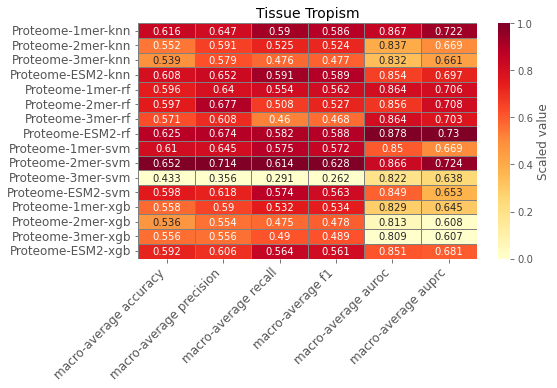

In [ ]:
def tissue_tropism_proteome_feature_ML_selection_heatmap():
    import os
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    from sklearn.metrics import (
        accuracy_score, precision_score, recall_score, f1_score,
        roc_auc_score, average_precision_score
    )
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import label_binarize
    
    ml_list = ["knn", "rf", "svm", "xgb"]
    feature_type_list = ["1mer", "2mer", "3mer", "esm"]
    metrics = ["accuracy", "precision", "recall", "f1", "auroc", "auprc"]

    results = []

    # 遍历所有方法
    for ml in ml_list:
        for feat in feature_type_list:
            method_name = f"Proteome-{feat}-{ml}"
            metric_values_list = []

            # 遍历100个文件
            for idx in range(0, 100):
                if feat != "esm":
                    filename = f"../data/supplementary_figs/tissue_tropism/result_20other_kmer/{ml}_proteome/Tpprimary_{feat}/probs_split{idx}.csv"
                else:
                    filename = f"../data/supplementary_figs/tissue_tropism/result_20other_LLM/{ml}_esm/Tpprimary/probs_split{idx}.csv"
                if not os.path.exists(filename):
                    print("缺失文件:", filename)
                    continue

                dt_tmp = pd.read_csv(filename, sep=",", header=0)
                dt_tmp.columns = ["prob_gastrointestinal","prob_neural","prob_other","prob_respiratory","prob_systemic","prob_viraemic"]+list(dt_tmp.columns)[6:]
                y_true = dt_tmp["true"].values
                y_pred = dt_tmp["pred"].values
                y_prob = dt_tmp[["prob_gastrointestinal","prob_neural","prob_other","prob_respiratory","prob_systemic","prob_viraemic"]].values
                
                # ==== 计算指标 ====
                acc = accuracy_score(y_true, y_pred)
                prec = precision_score(y_true, y_pred, average="macro", zero_division=0)
                rec = recall_score(y_true, y_pred, average="macro", zero_division=0)
                f1 = f1_score(y_true, y_pred, average="macro", zero_division=0)
                
                # 多分类 one-vs-rest 概率输入
                classes = np.unique(y_true)
                if len(classes) < 2:
                    auroc = np.nan
                    auprc = np.nan
                else:
                    try:
                        y_true_bin = label_binarize(y_true, classes=classes)
                        auroc = roc_auc_score(y_true_bin, y_prob[:, :len(classes)], 
                                              average="macro", multi_class="ovr")
                    except ValueError:
                        auroc = np.nan

                    try:
                        y_true_bin = label_binarize(y_true, classes=classes)
                        auprc = average_precision_score(y_true_bin, y_prob[:, :len(classes)], 
                                                        average="macro")
                    except ValueError:
                        auprc = np.nan

                metric_values_list.append([acc, prec, rec, f1, auroc, auprc])

            # 对100次实验结果取均值
            if len(metric_values_list) > 0:
                mean_values = np.nanmean(metric_values_list, axis=0)
                tmp_dict = dict(zip(metrics, mean_values))
                tmp_dict["Method"] = method_name
                results.append(tmp_dict)

    # 生成 DataFrame
    df_mean = pd.DataFrame(results).set_index("Method")
    df_mean.index = df_mean.index.str.replace("esm", "ESM2", regex=False)

    # ========== 缩放 (0-1) ==========
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(
        scaler.fit_transform(df_mean),
        index=df_mean.index,
        columns=df_mean.columns
    )

    # ========== 绘制热图 ==========
    plt.figure(figsize=(8, 5.5))
    ax = sns.heatmap(
        df_scaled,
        annot=df_mean.round(3),   # 标注原始均值
        fmt="g",
        cmap="YlOrRd",
        cbar_kws={"label": "Scaled value"},
        linewidths=0.5,
        linecolor="grey"
    )

    plt.title("Tissue Tropism", fontsize=14)
    plt.yticks(rotation=0, fontsize=12)
    #plt.xticks(rotation=45, ha="right", fontsize=12)
    metrics_display = ["macro-average accuracy", "macro-average precision", "macro-average recall", 
                      "macro-average f1", "macro-average auroc", "macro-average auprc"]
    
    plt.xticks(ticks=np.arange(len(metrics)) + 0.5, 
               labels=metrics_display, 
               rotation=45, ha="right", fontsize=12)
    
    
    plt.ylabel("")
    plt.tight_layout()

    plt.savefig("../fig_saved/Supple_Fig3B_tissue_tropism_proteome.pdf",
            format="pdf", 
            dpi=300,  # 高分辨率
            bbox_inches="tight", # 防止内容被裁剪
            pad_inches=0.1)  # 添加少许边距
    plt.show()


if __name__ == "__main__":
    tissue_tropism_proteome_feature_ML_selection_heatmap()


### Supplementary Fig. 6 Human infectivity prediction for potentially human-infecting viruses using the PPI-based model.

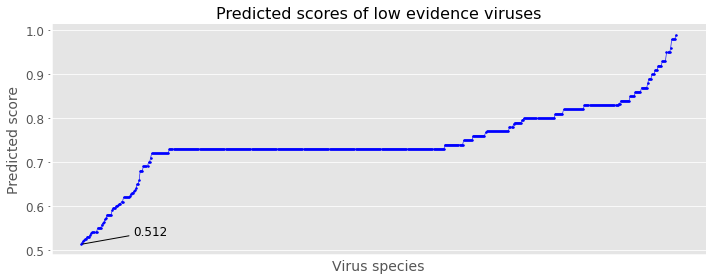

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

def res_low_evidence_virus():

    # ===== 读入并排序 =====
    dt = pd.read_csv("../data/low_evidence_virus/v403_low_evidence_human_infectivity_pred_score.csv")
    dt_sorted = dt.sort_values(by="pred_score", ascending=True).reset_index(drop=True)
    dt_sorted.to_csv("./v573_low_evidence_human_infectivity_pred_score.csv", sep="\t", index=False)

    # ===== 找最小值 =====
    min_idx = dt_sorted["pred_score"].idxmin()
    min_val = dt_sorted.loc[min_idx, "pred_score"]

    # ===== 创建画布（明确背景）=====
    fig = plt.figure(figsize=(10, 4))
    ax = fig.add_subplot(111)

    # ===== 绘制曲线 =====
    ax.plot(
        range(len(dt_sorted)),
        dt_sorted["pred_score"],
        marker="o",
        markersize=1.5,
        linewidth=0.6,
        color="blue"
    )

    # ===== 标注最小值 =====
    ax.annotate(
        f"{min_val:.3f}",
        xy=(min_idx, min_val),
        xytext=(min_idx + 50, min_val + 0.02),
        arrowprops=dict(arrowstyle="-", color="black", lw=1),
        fontsize=12,
        color="black"
    )

    # ===== 设置轴标签 =====
    ax.set_xlabel("Virus species", fontsize=14)
    ax.set_ylabel("Predicted score", fontsize=14)
    ax.set_title("Predicted scores of low evidence viruses", fontsize=16)

    ax.set_xticks([])
    ax.tick_params(axis="y", labelsize=12)

    # ======== 边框设置（关键部分）========
    # 去掉上、右
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # 加粗左、下
    ax.spines["left"].set_linewidth(2.5)
    ax.spines["bottom"].set_linewidth(2.5)

    # ===== 保存图片 =====
    fig.tight_layout()
    fig.savefig("../fig_saved/supple_Fig4_low_evidence_infect_human_pred_score.pdf",
                dpi=300,
                bbox_inches="tight",
                pad_inches=0.1)

    plt.show()


if __name__ == "__main__":
    res_low_evidence_virus()


### Supplementary Fig. 7 Distribution of SHAP values for human genes predicted to interact with HPVs.

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
18 input query terms found dup hits:	[('P47929', 2), ('P0DP23', 3), ('Q9ULR0', 2), ('P84243', 2), ('Q71DI3', 3), ('Q6P1K2', 2), ('Q99666'
9 input query terms found no hit:	['Q96L14', 'P01857', 'Q1A5X7', 'Q9BRJ2', 'Q58FG1', 'A2A3N6', 'O43930', 'P57078', 'Q8NHW5']
Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


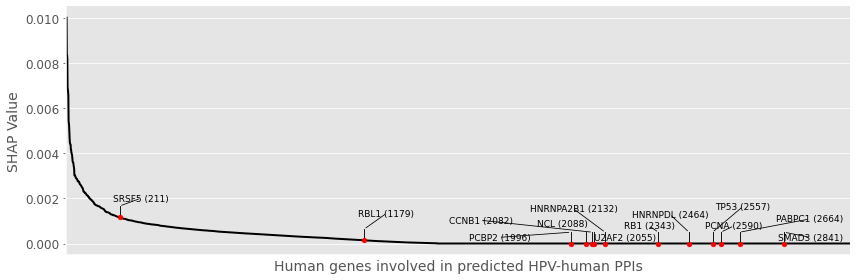

In [42]:
def figshow_known_human_gene_lineplot():
    import pandas as pd
    import numpy as np
    import mygene
    import matplotlib.pyplot as plt
    from adjustText import adjust_text

    known_gene_of_hpv_infection = [
        "CCNB1","SMAD3","PCNA","HNRNPDL","TP53","RB1","RBL1","RBL2",
        "NCL","U2AF2","PABPC1","HNRNPA2B1","SRSF5","PCBP2"
    ]  # 已知与HPV相关基因

    # ========= 1. 读取数据 =========
    df = pd.read_csv('../data/hpv_classification/ppi_binary_matrix.csv').rename(
        columns={'Unnamed: 0': 'Taxid', 'risk_label': 'Label'}
    )

    feature_importances_df = pd.read_csv("../data/hpv_classification/feature_importance/rf_feature_importances_ppibinary.csv")
    mean_importance = feature_importances_df.mean()
    top_n_features = mean_importance.sort_values(ascending=False)
    top_n_df = (top_n_features.rename('mean_importance')
                .reset_index()
                .rename(columns={'index':'uniprot'}))

    mg = mygene.MyGeneInfo()
    out = mg.querymany(top_n_df["uniprot"].tolist(), scopes="uniprot", fields="symbol", species="human")
    df_map = pd.DataFrame(out)
    df_map["symbol"].fillna("NoGene", inplace=True)
    dict_unid2gene = {df_map["query"][i]: df_map["symbol"][i] for i in range(df_map.shape[0])}

    colnames_gene = []
    for p in top_n_df["uniprot"].tolist():
        try:
            genename = dict_unid2gene[p]
            colnames_gene.append(genename if genename != "NoGene" else p)
        except Exception:
            colnames_gene.append(p)
    top_n_df["gene"] = colnames_gene

    # ===== 排序并计算排名 =====
    rank_df = (top_n_df
               .sort_values("mean_importance", ascending=False)
               .reset_index(drop=True))
    rank_df["rank"] = rank_df.index + 1

    x = np.arange(len(rank_df))
    y = rank_df["mean_importance"].to_numpy()

    # ===== 基础折线图 =====
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.plot(x, y, color="black", linewidth=2)
    ax.set_xlim(-0.5, len(rank_df) - 0.5)
    ax.set_xticks([])  # 去掉x轴刻度

    # ===== 找到已知HPV基因并标红点 =====
    known_set = {g.upper() for g in known_gene_of_hpv_infection}
    present_idx = [i for i, g in enumerate(rank_df["gene"]) if str(g).upper() in known_set]

    ax.scatter(x[present_idx], y[present_idx], s=23, color="red", zorder=3)

    # ===== 自动散开标签 =====
    texts = []
    for i in present_idx:
        xi, yi = x[i], y[i]
        lx, ly = xi, yi + 0.05 * (y.max() - y.min())  # 初始稍微往上
        ax.plot([xi, lx], [yi, ly], linestyle="-", linewidth=0.9, color="black")
        texts.append(
            ax.text(lx, ly,
                    f"{rank_df.loc[i, 'gene']} ({int(rank_df.loc[i,'rank'])})",
                    ha="center", va="bottom", fontsize=9)
        )

    # 让文本自动调整，避免重叠
    adjust_text(texts, ax=ax,
                expand_text=(1.2, 1.4),
                arrowprops=dict(arrowstyle="-", color="black", lw=0.8))

    # ===== 其他美化 =====
    plt.xlabel('Human genes involved in predicted HPV-human PPIs', fontsize=14)
    plt.ylabel('SHAP Value', fontsize=14)
    plt.yticks(fontsize=12)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    plt.tight_layout()
    
    plt.savefig("../fig_saved/supple_Fig5_known_hpv_gene_distribution.pdf",
            format="pdf", 
            dpi=300,  # 高分辨率
            bbox_inches="tight", # 防止内容被裁剪
            pad_inches=0.1)  # 添加少许边距
    
    plt.show()


if __name__ == "__main__":
    figshow_known_human_gene_lineplot()
